In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
%matplotlib inline

In [4]:
cd ~/Development/kaggle/eeg/

/Users/jose/Development/kaggle/eeg


In [5]:
series = pd.read_csv('train/subj1_series1_data.csv', index_col=0)
print series.head()

                 Fp1  Fp2   F7   F3   Fz   F4   F8  FC5  FC1  FC2  FC6   T7  \
id                                                                            
subj1_series1_0  -31  363  211  121  211   15  717  279   35  158  543 -166   
subj1_series1_1  -29  342  216  123  222  200  595  329   43  166  495 -138   
subj1_series1_2 -172  278  105   93  222  511  471  280   12  177  534 -163   
subj1_series1_3 -272  263  -52   99  208  511  428  261   27  180  525 -310   
subj1_series1_4 -265  213  -67   99  155  380  476  353   32  165  507 -320   

                  C3   Cz   C4   T8  TP9  CP5  CP1  CP2  CP6  TP10   P7   P3  \
id                                                                             
subj1_series1_0  192  230  573  860  128   59  272  473  325   379  536  348   
subj1_series1_1  201  233  554  846  185   47  269  455  307   368  529  327   
subj1_series1_2  198  207  542  768  145   52  250  452  273   273  511  319   
subj1_series1_3  212  221  542  808  115   41 

In [6]:
events = pd.read_csv('train/subj1_series1_events.csv', index_col=0)
print events.head()

                 HandStart  FirstDigitTouch  BothStartLoadPhase  LiftOff  \
id                                                                         
subj1_series1_0          0                0                   0        0   
subj1_series1_1          0                0                   0        0   
subj1_series1_2          0                0                   0        0   
subj1_series1_3          0                0                   0        0   
subj1_series1_4          0                0                   0        0   

                 Replace  BothReleased  
id                                      
subj1_series1_0        0             0  
subj1_series1_1        0             0  
subj1_series1_2        0             0  
subj1_series1_3        0             0  
subj1_series1_4        0             0  


In [7]:
# are there overlapping classes?
sum_events = events.sum(axis=1)
len(sum_events[sum_events > 1])

6109

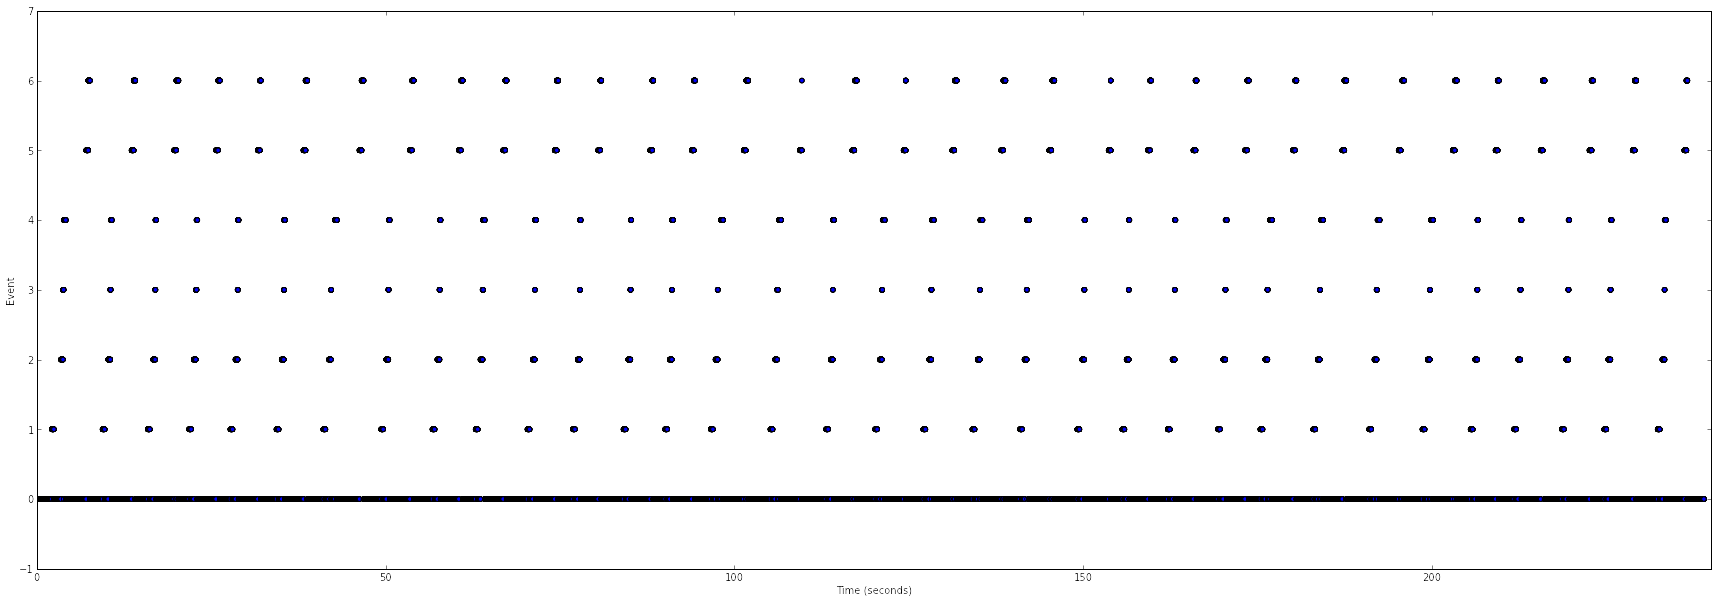

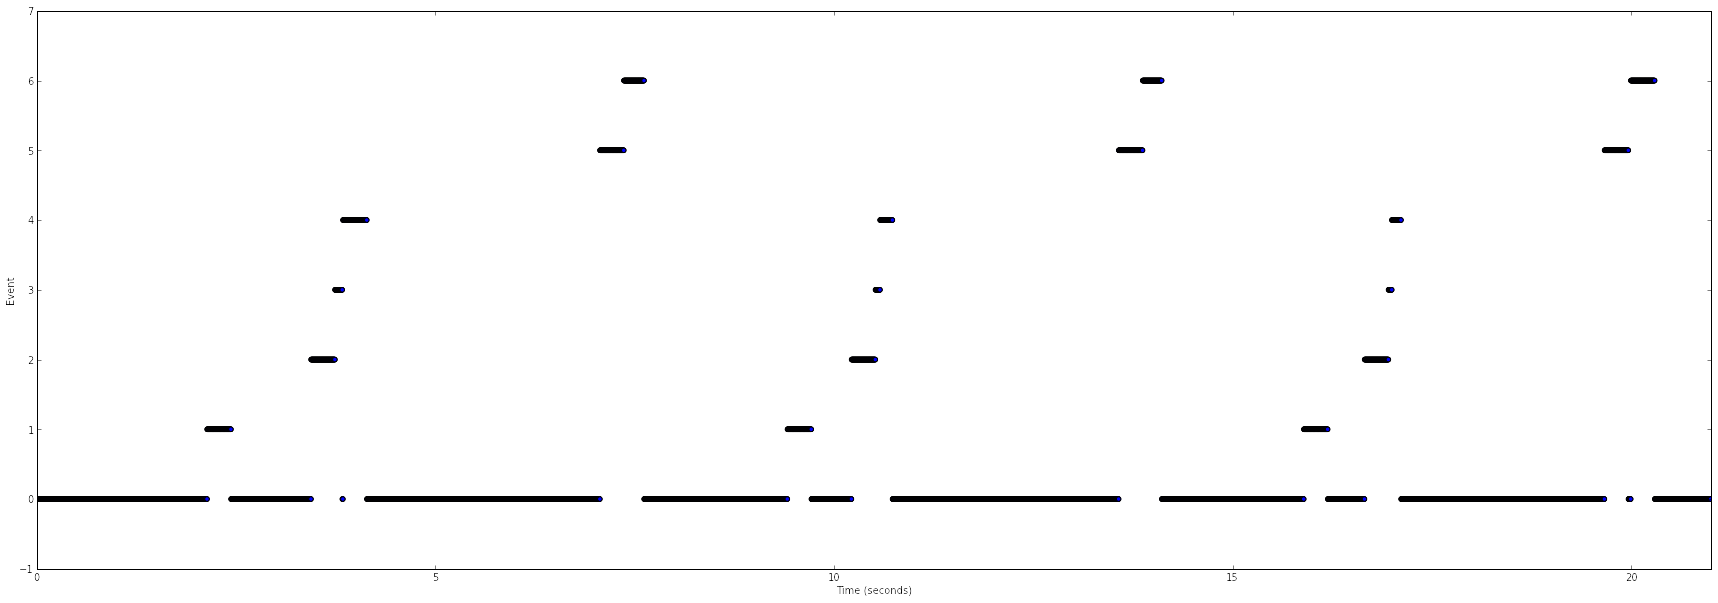

In [104]:
num_samples = len(events)
x_axis = np.arange(num_samples) / 500.
fig = plt.gcf()
fig.set_size_inches((30, 10))
labels = np.zeros(num_samples)
non_zero = events.values.sum(axis=1) > 0
labels[non_zero] = (np.argmax(events.values, axis=1)[non_zero] + 1)
plt.scatter(x_axis, labels)
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.xlim(0, x_axis[-1] + 1)
plt.show()
plt.close()
# there's a gap between liftoff and replace
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis[:10500], labels[:10500])
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.xlim(0, 21)
plt.show()
plt.close()

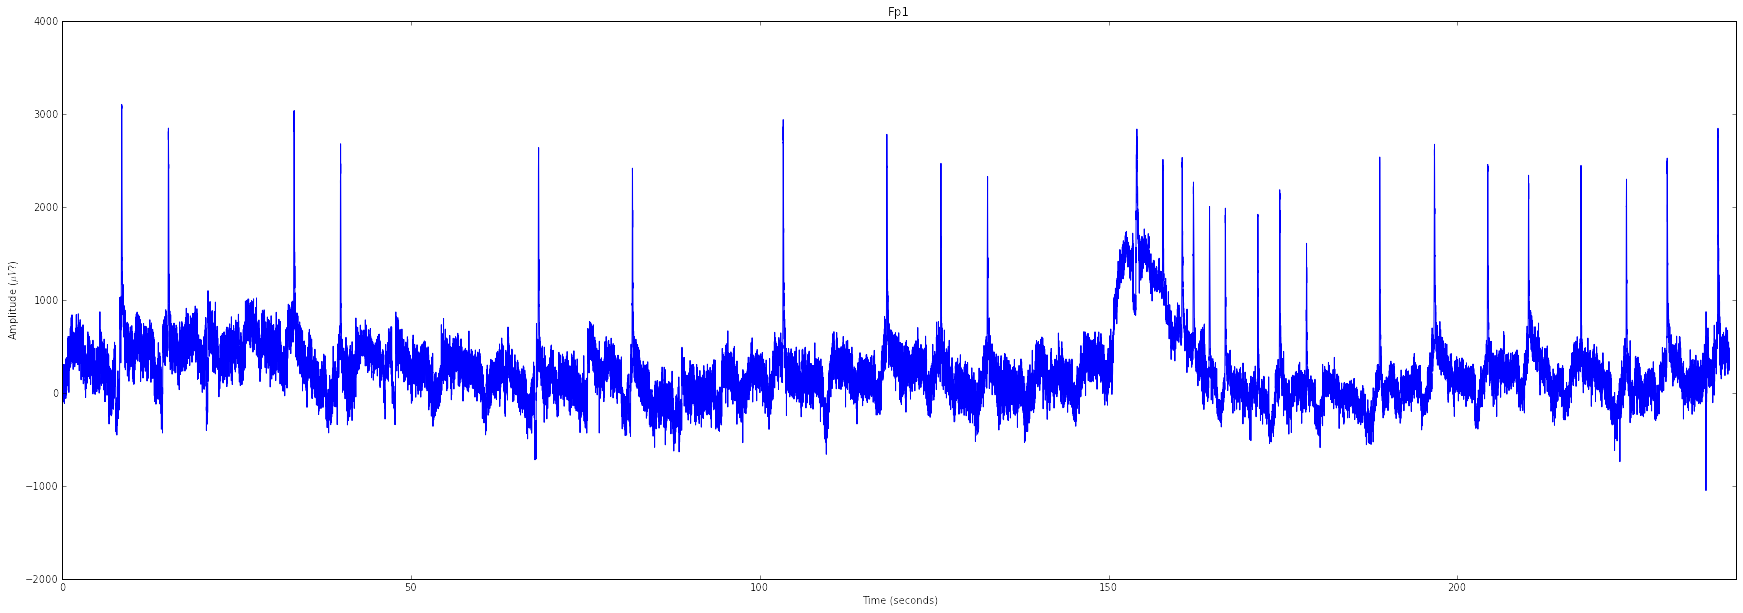

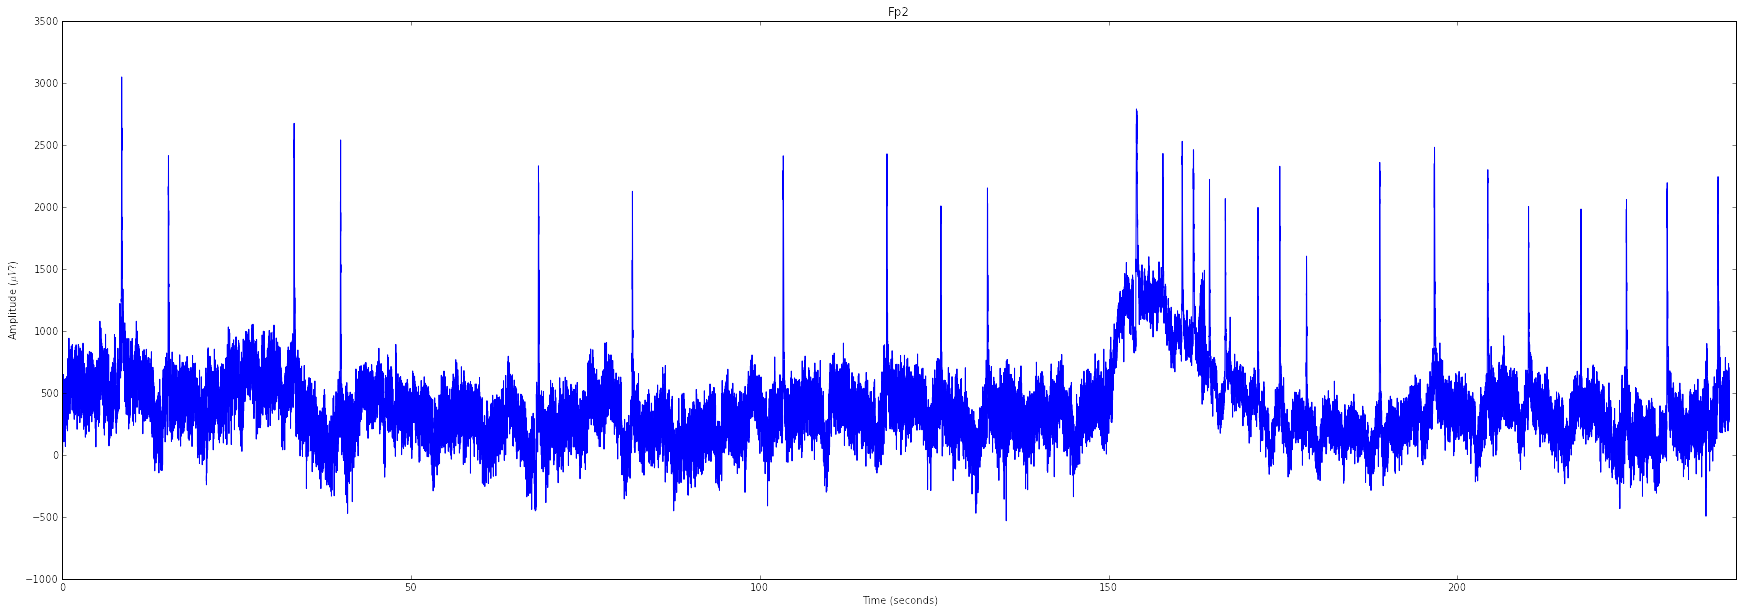

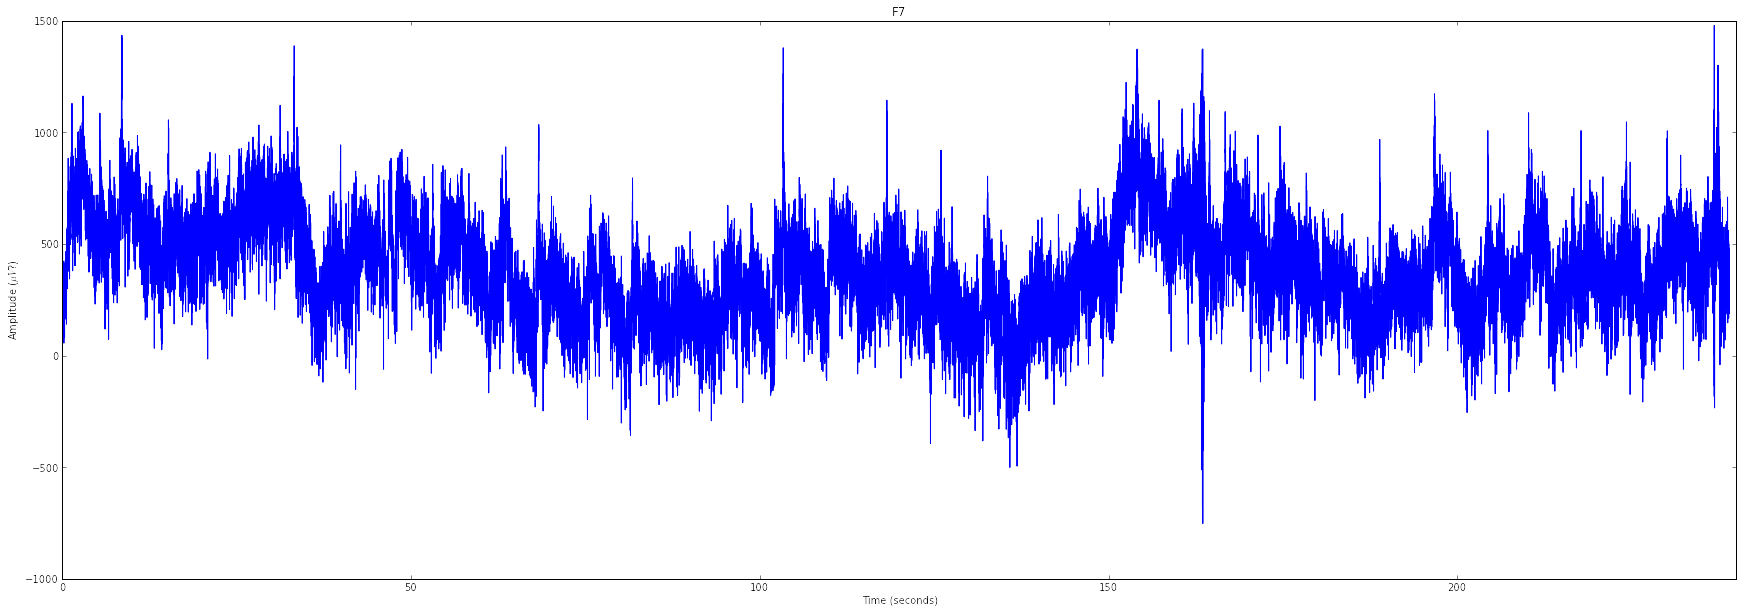

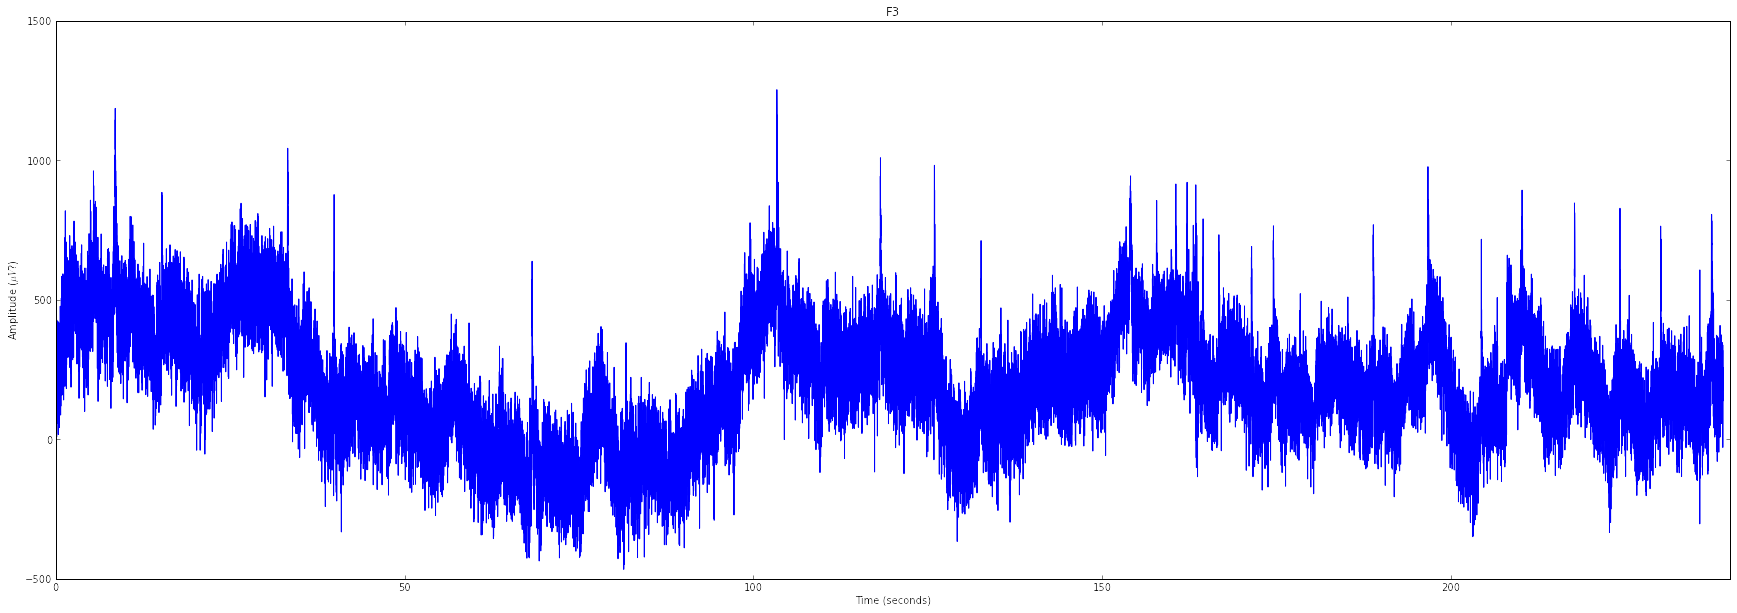

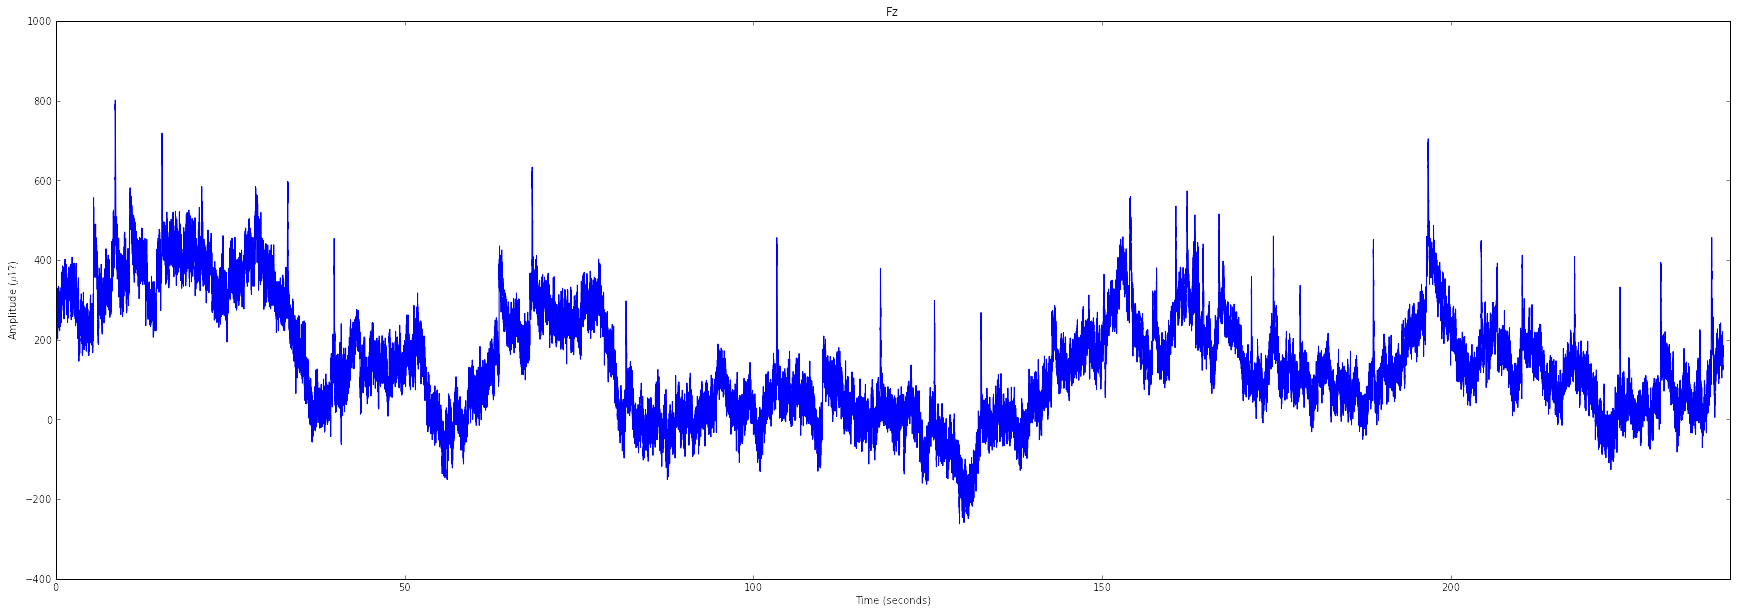

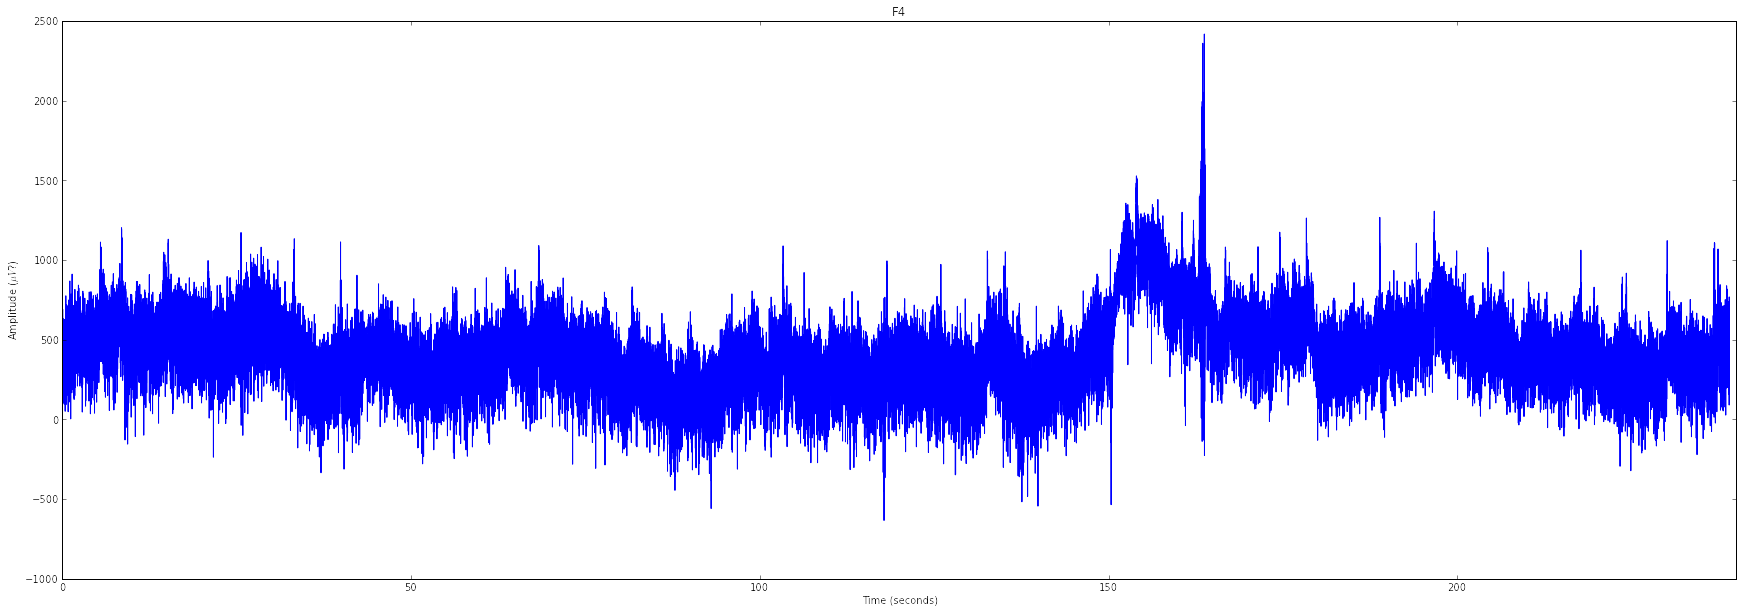

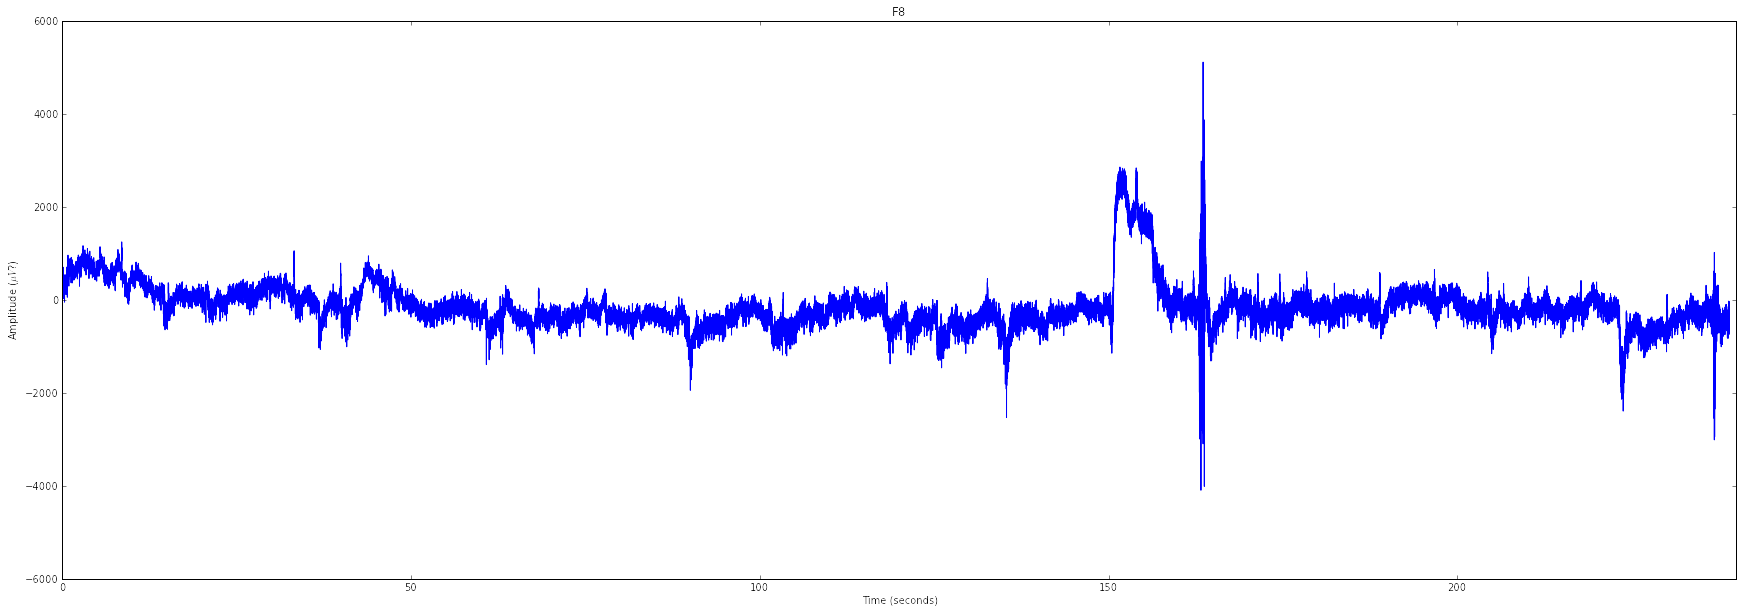

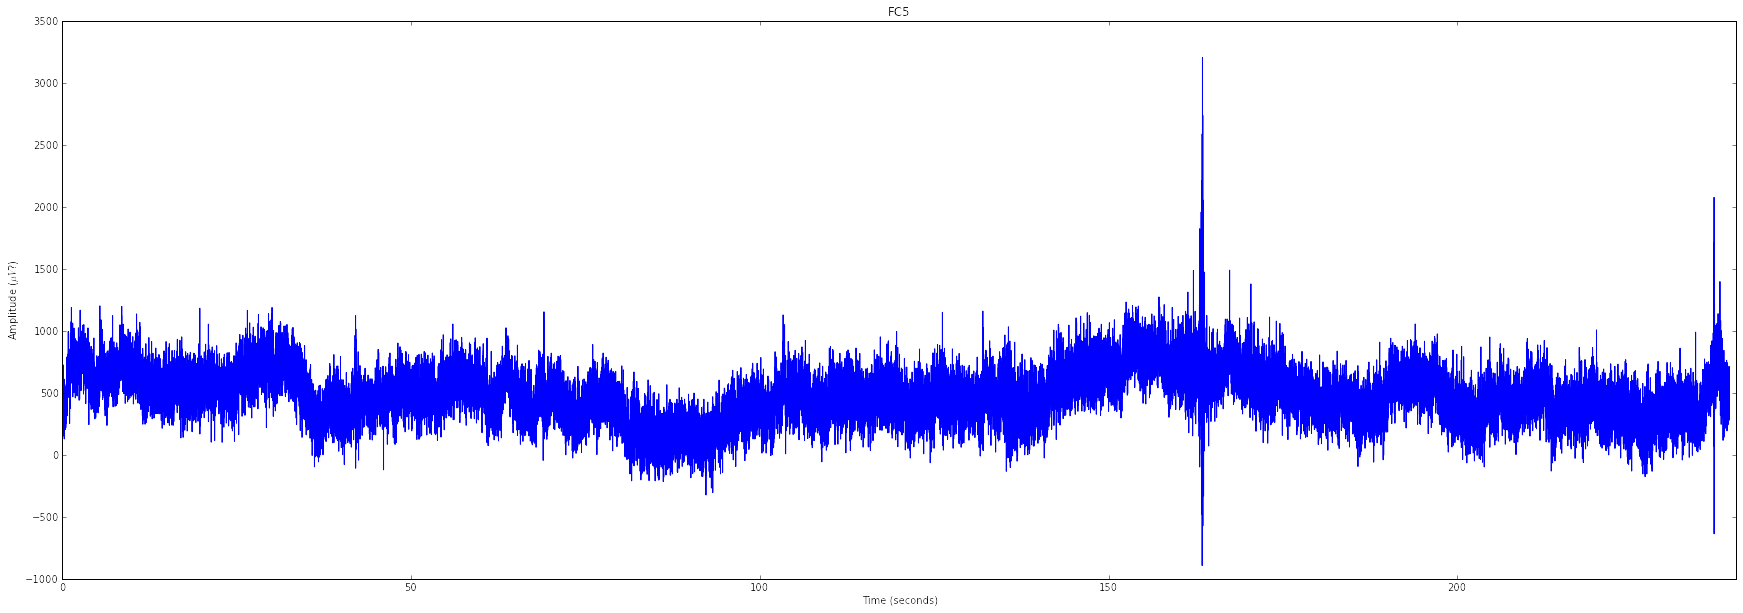

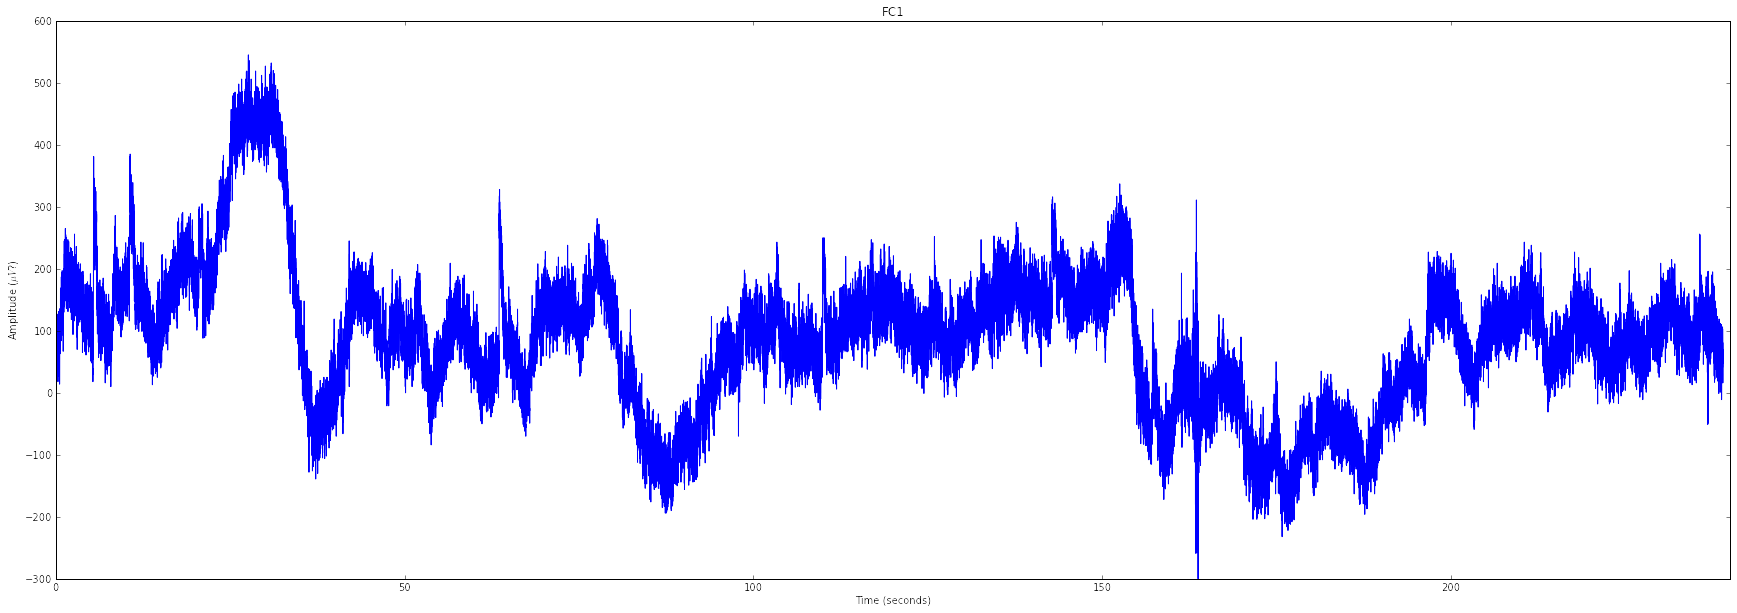

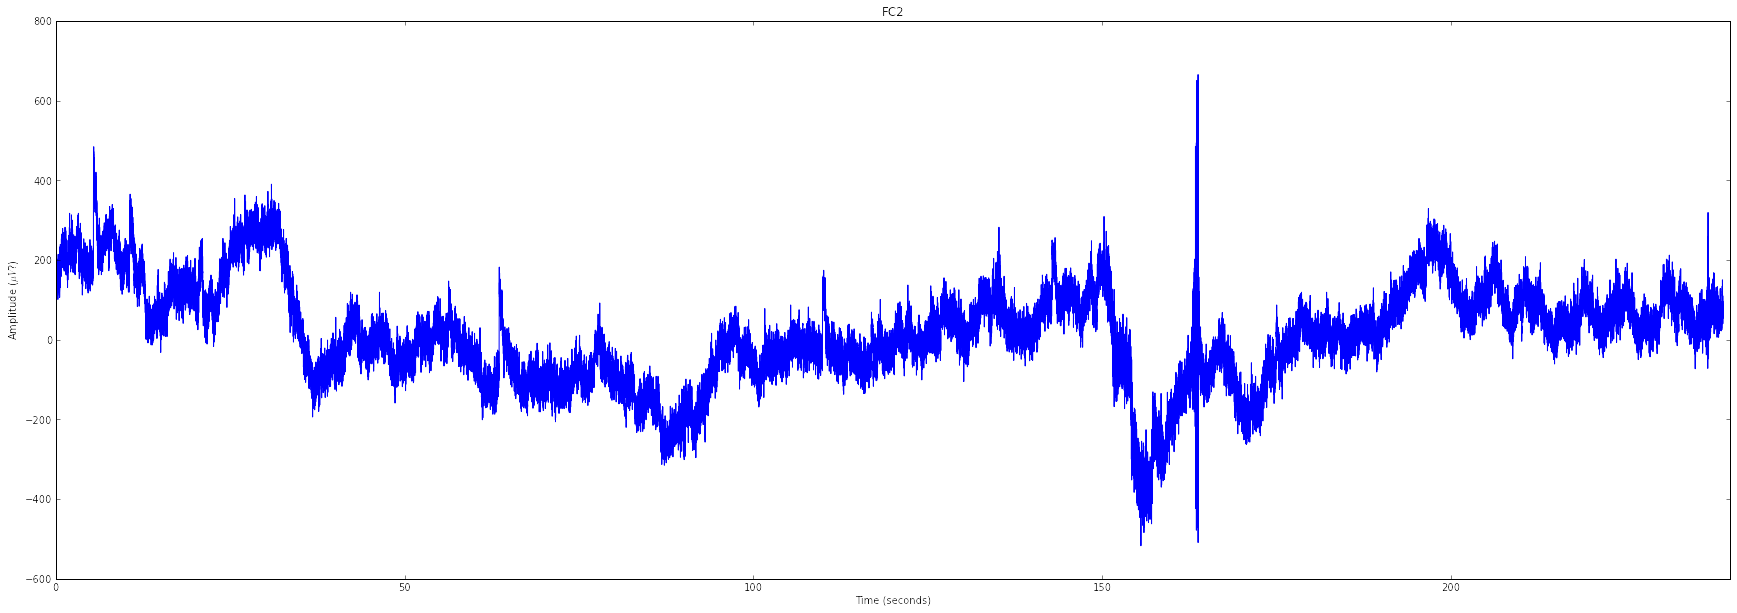

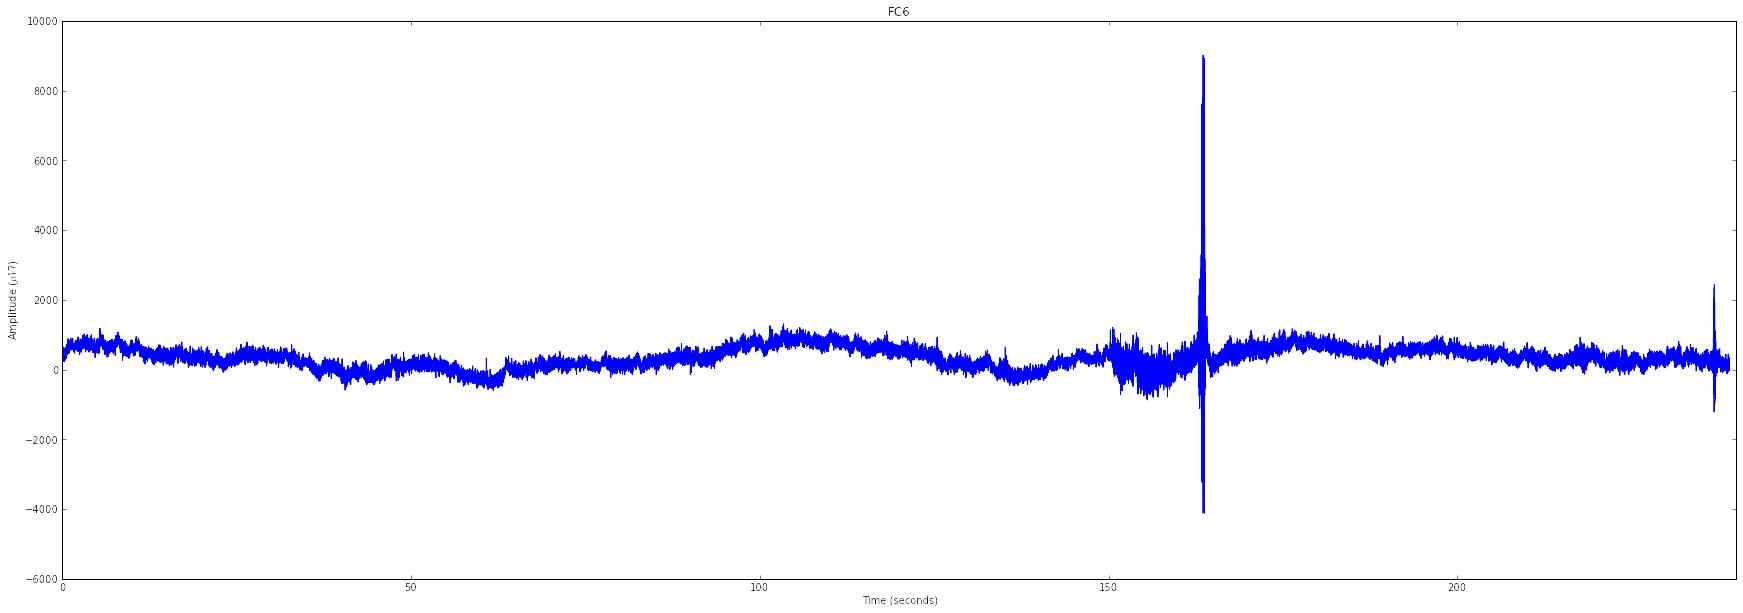

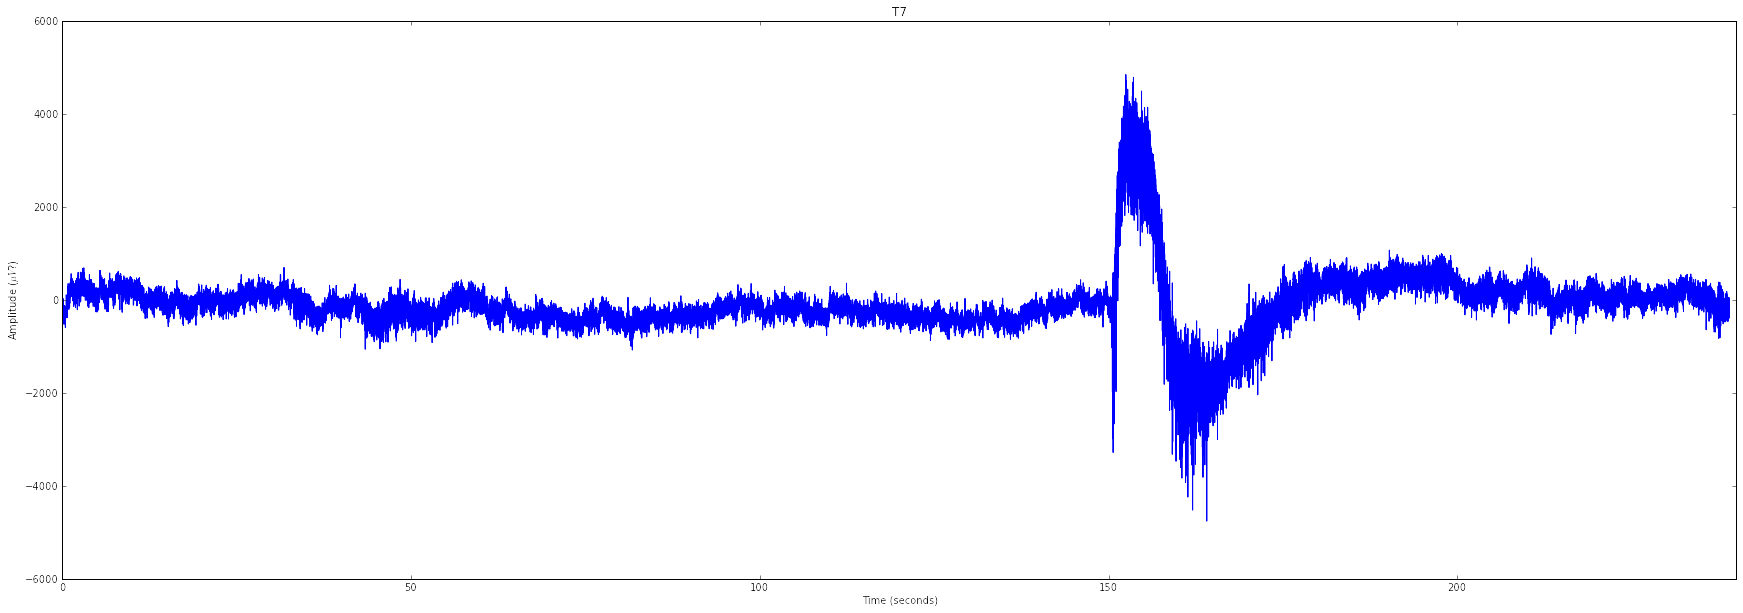

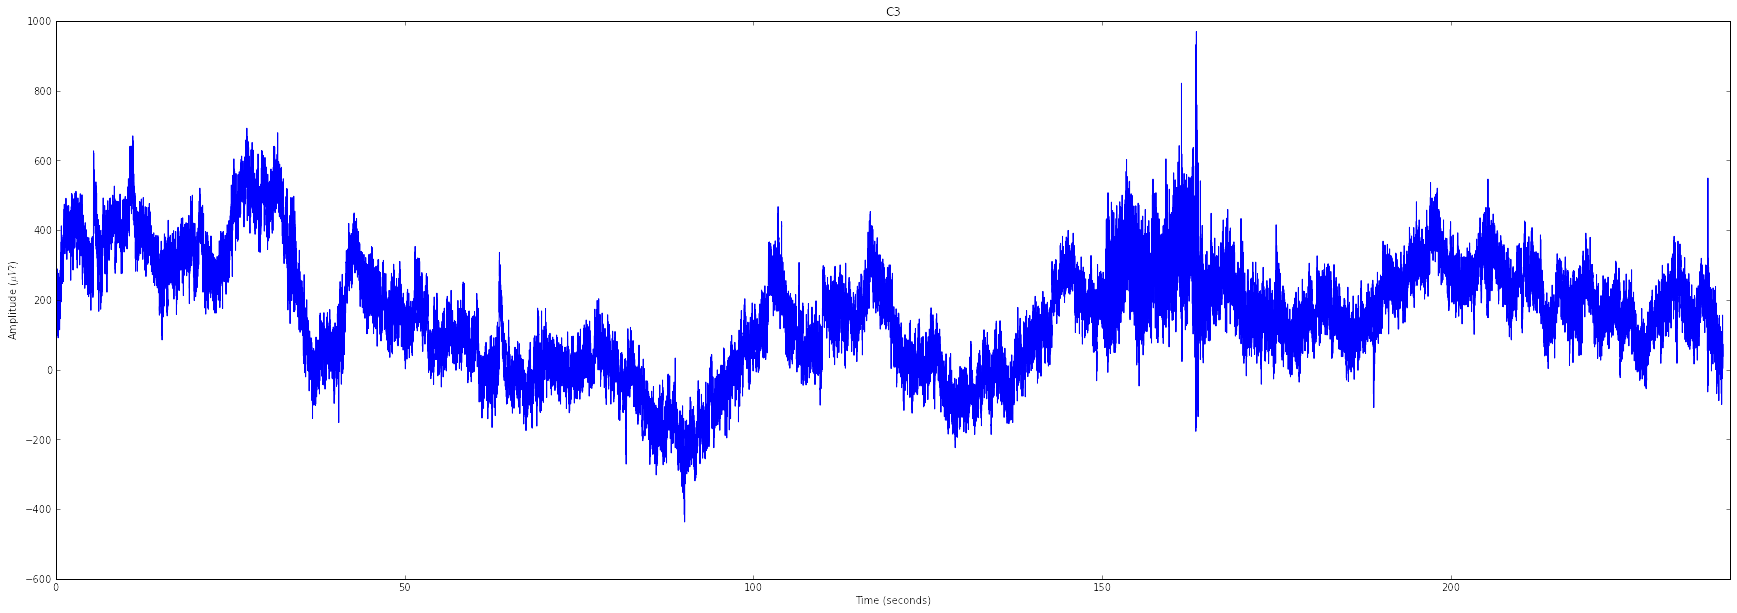

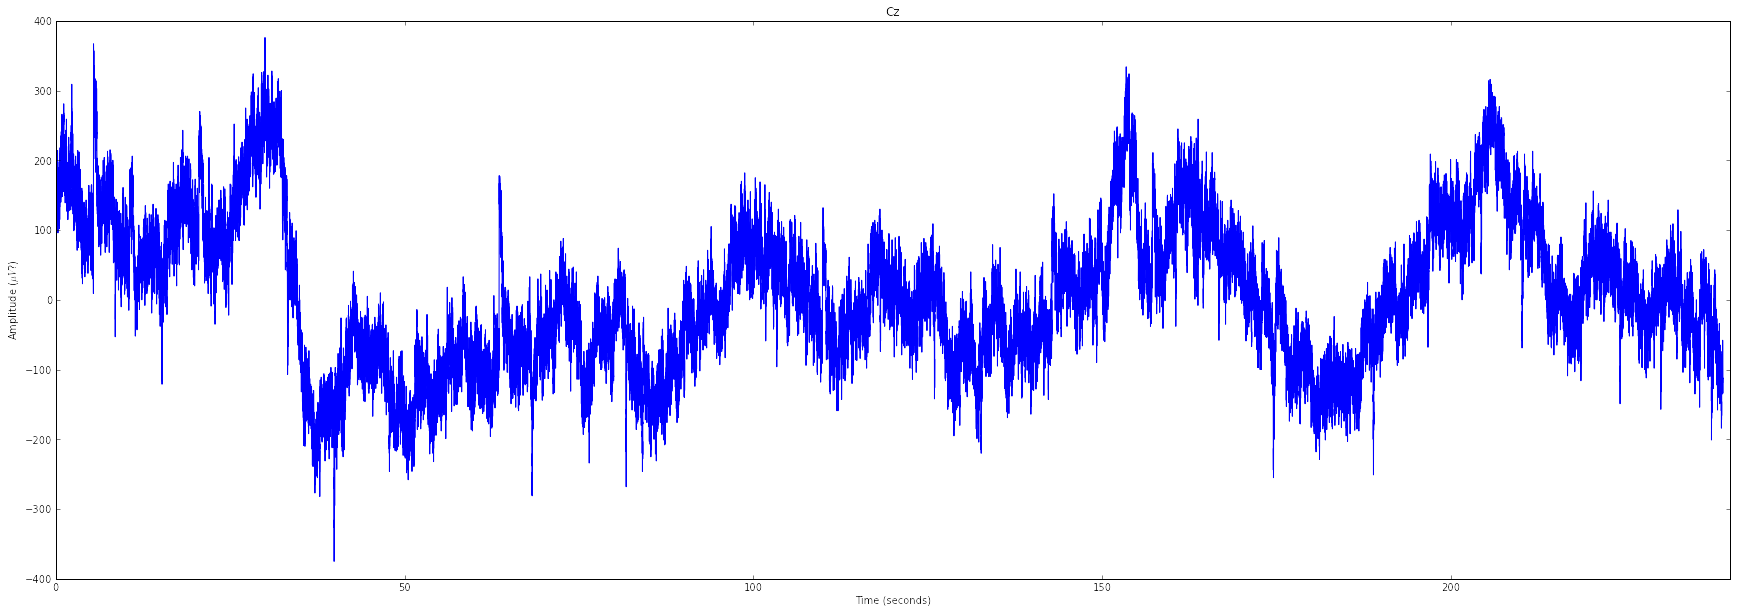

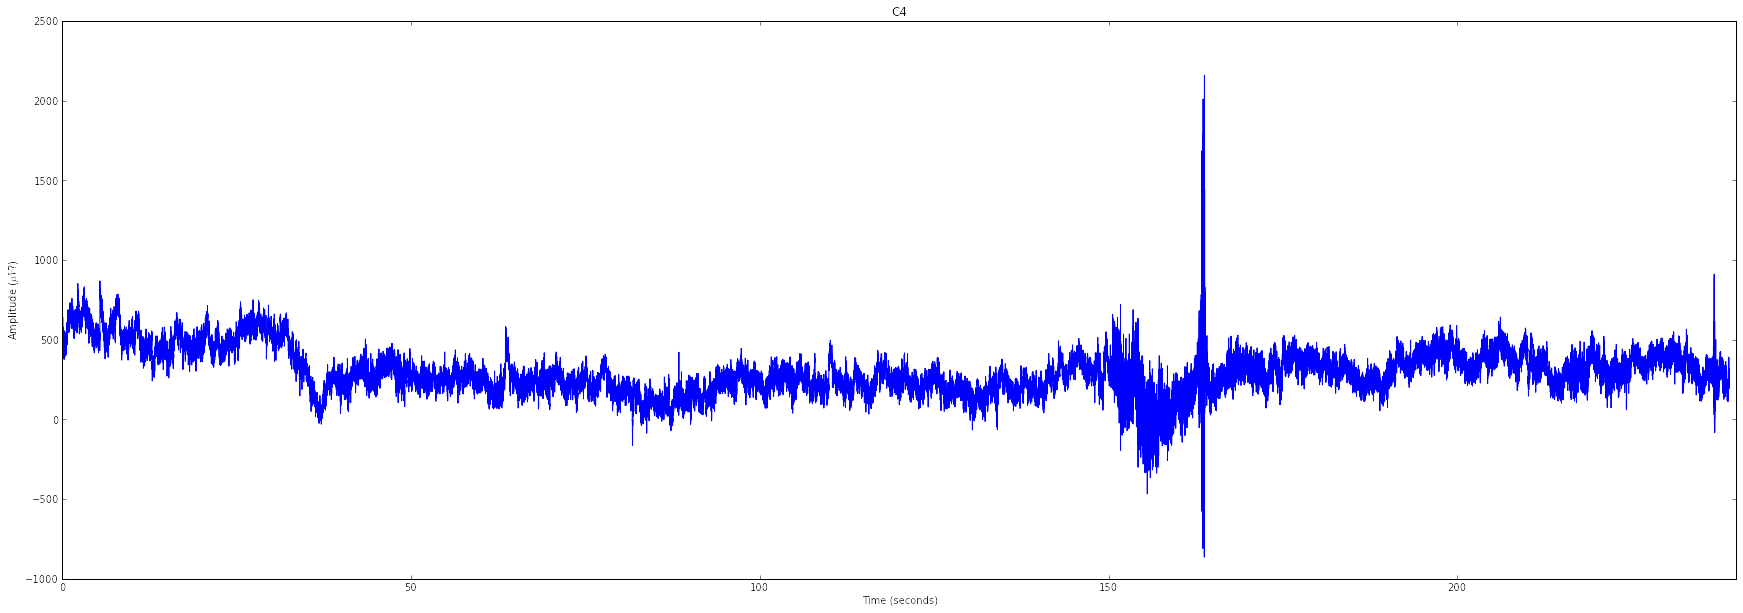

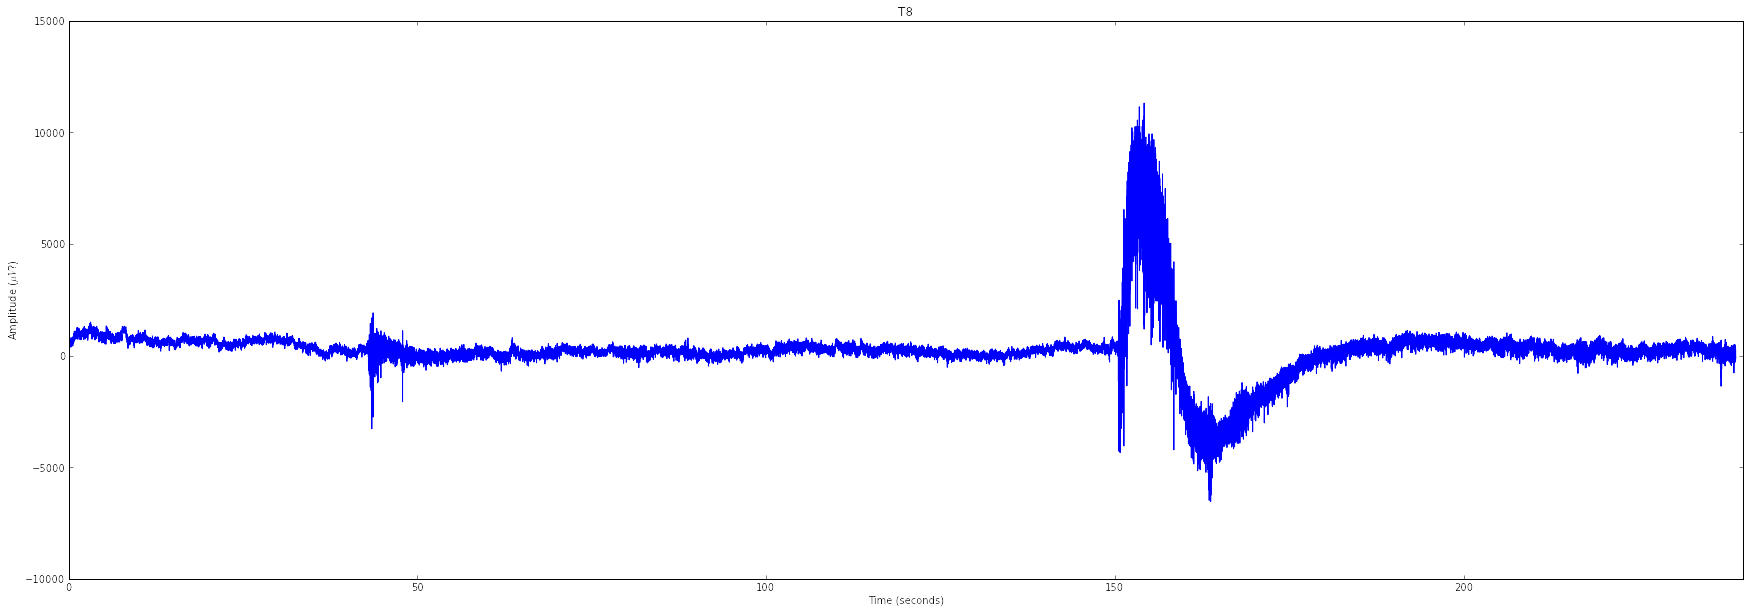

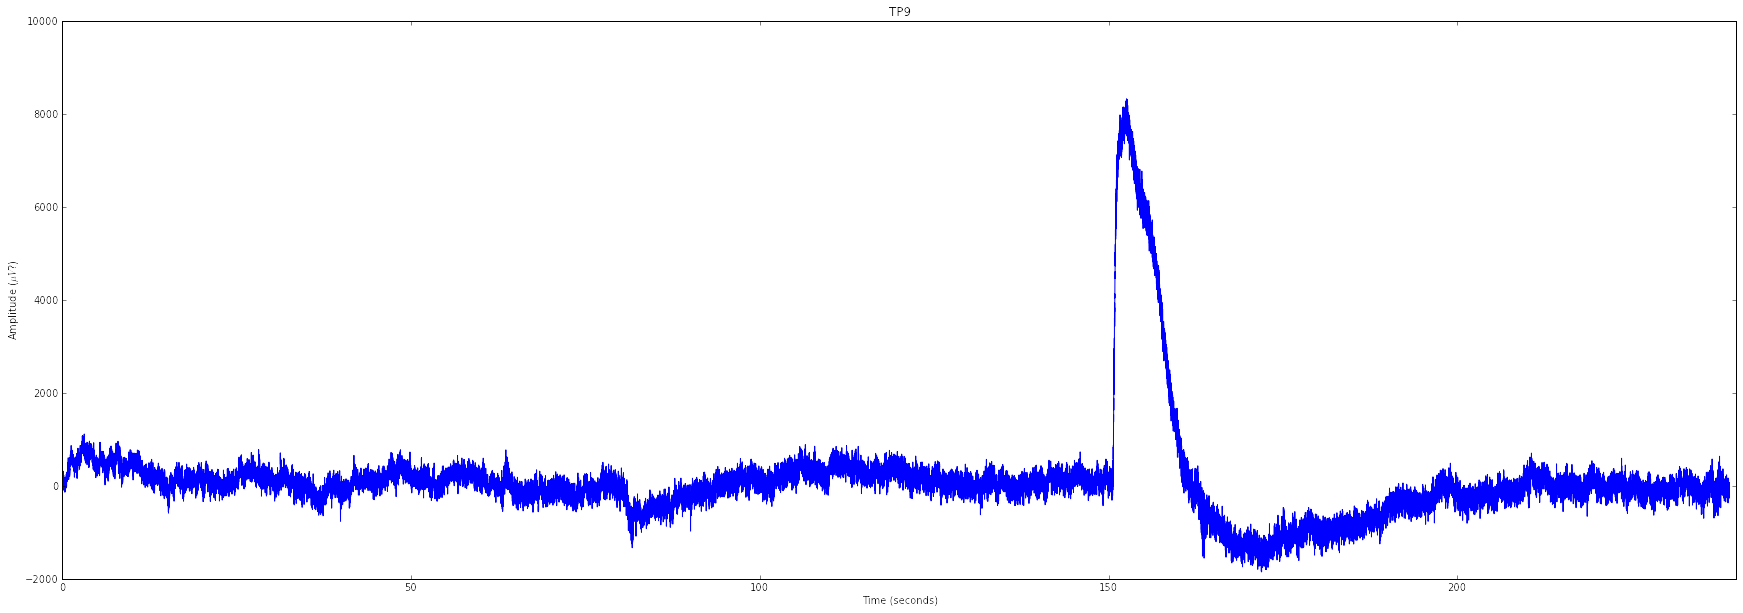

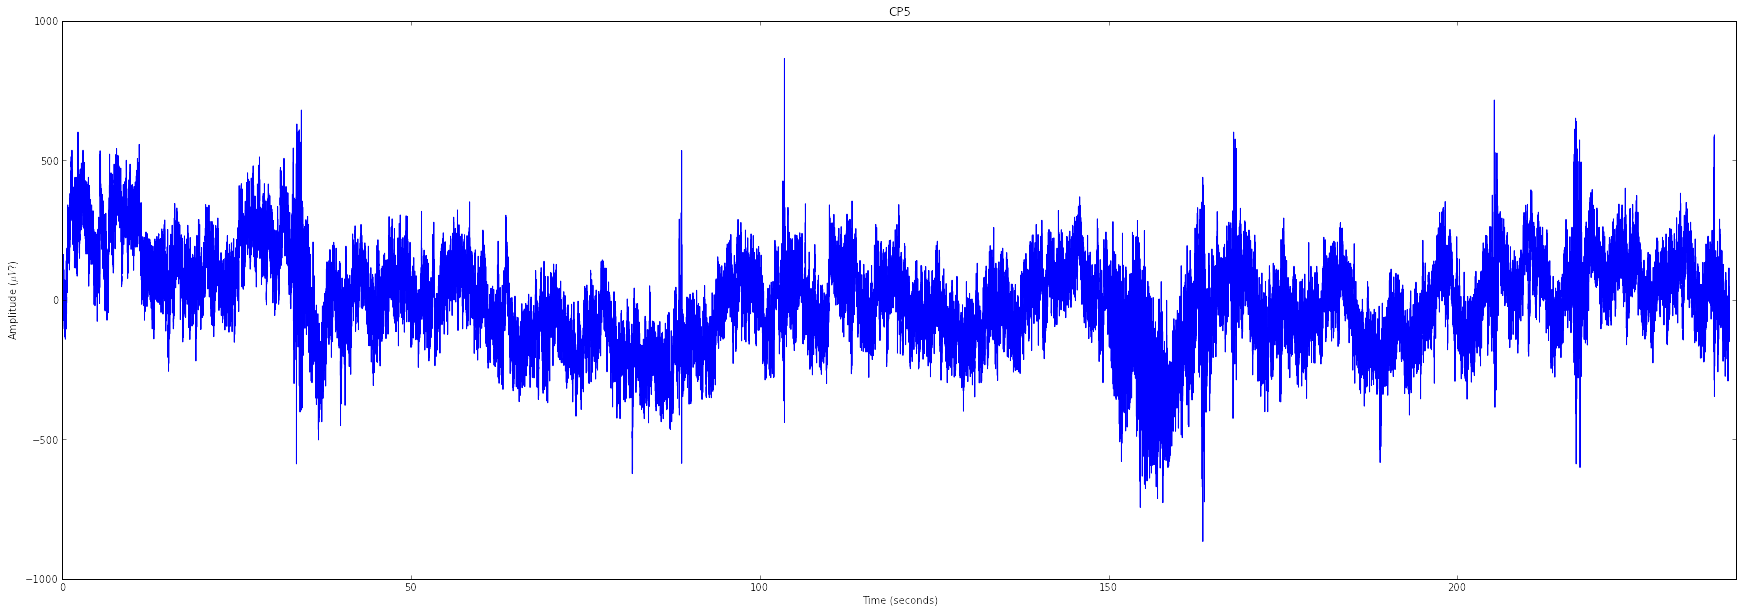

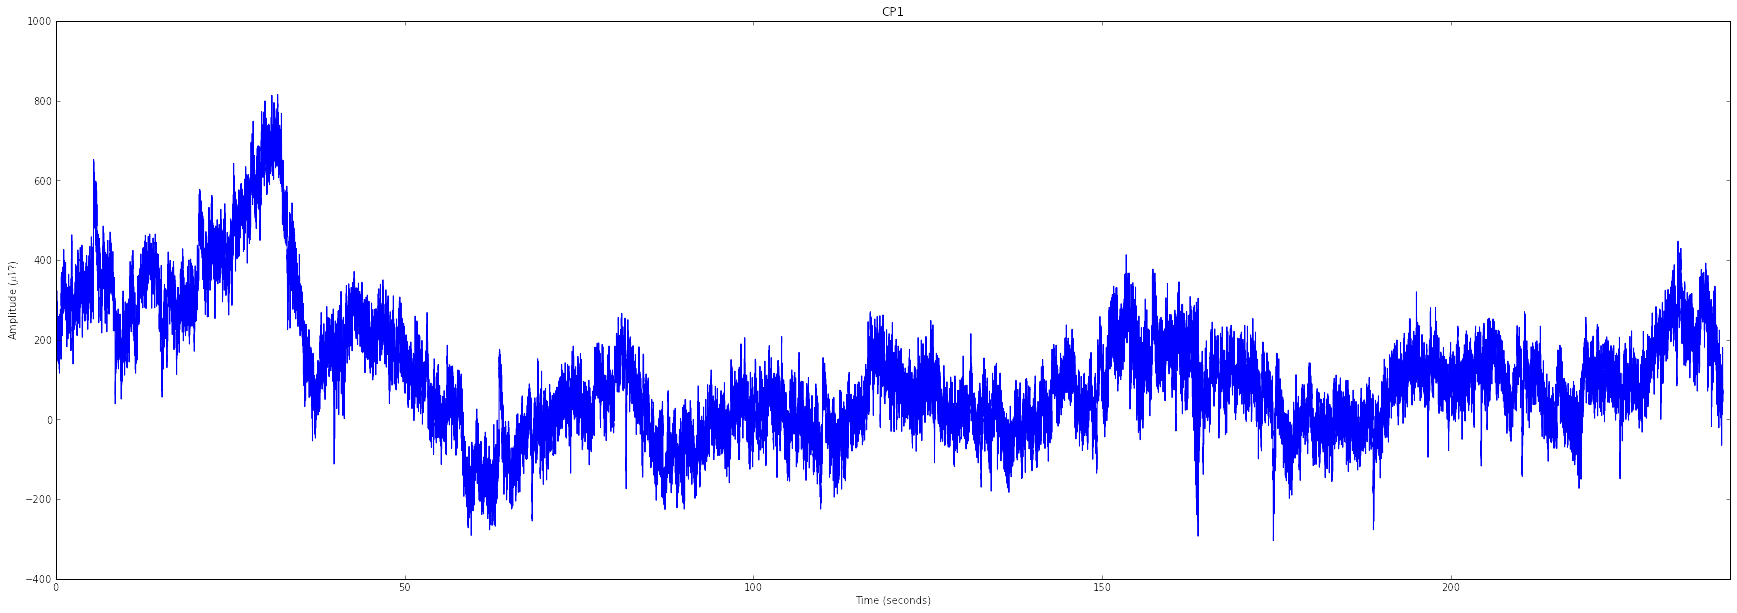

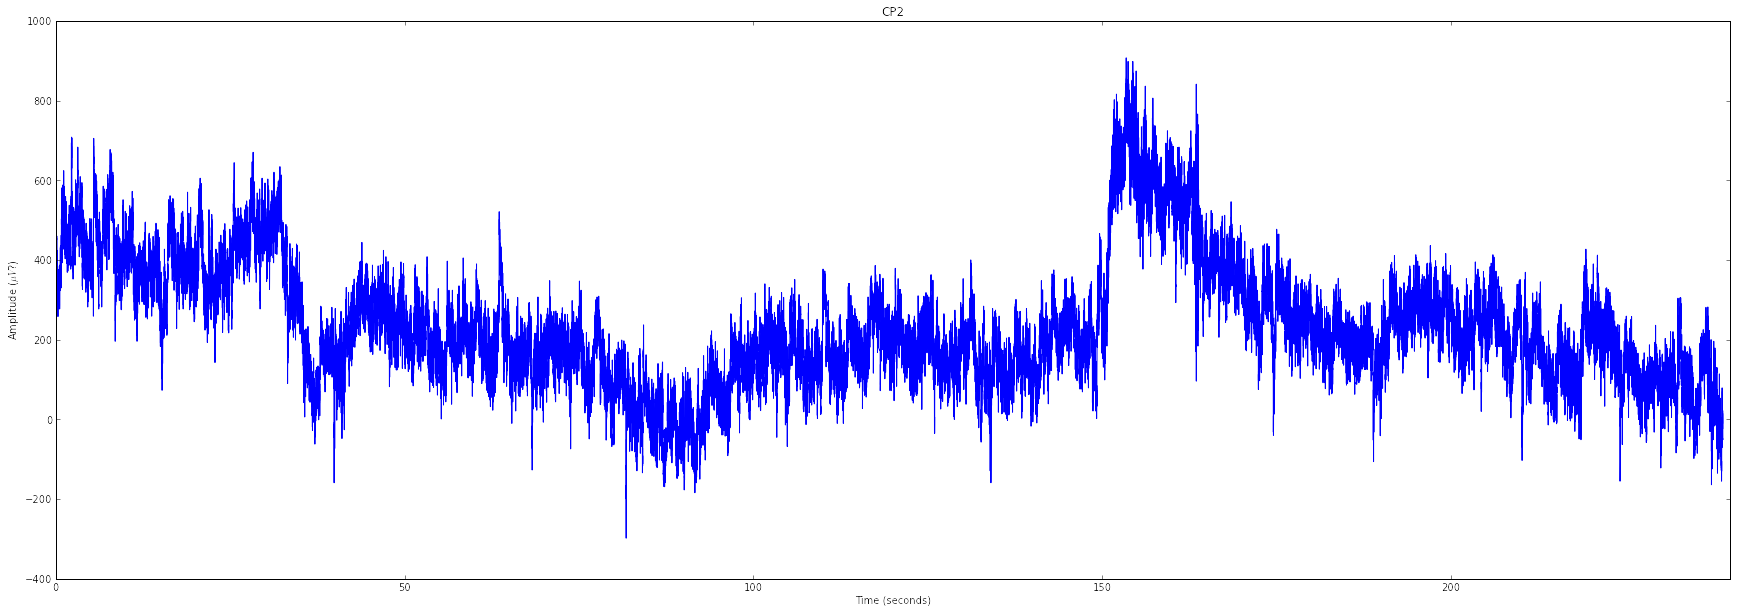

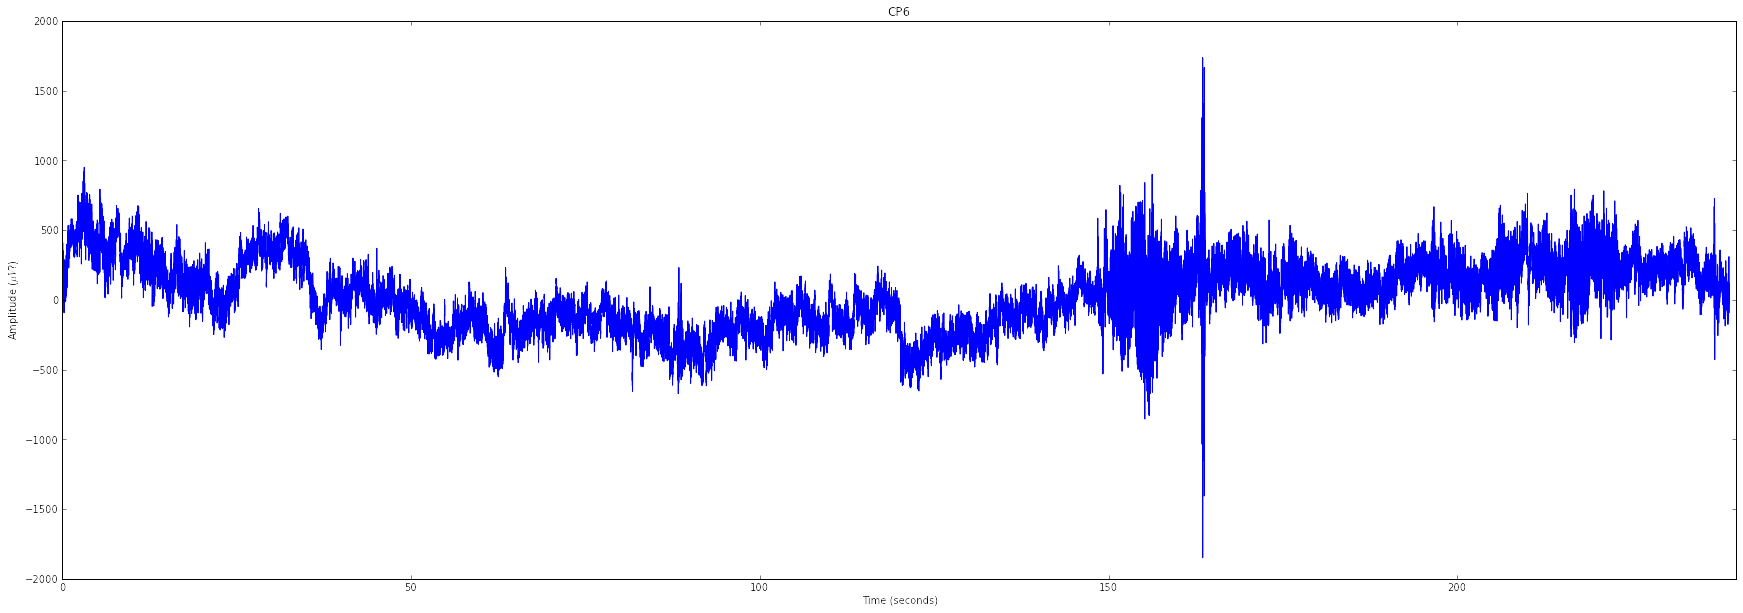

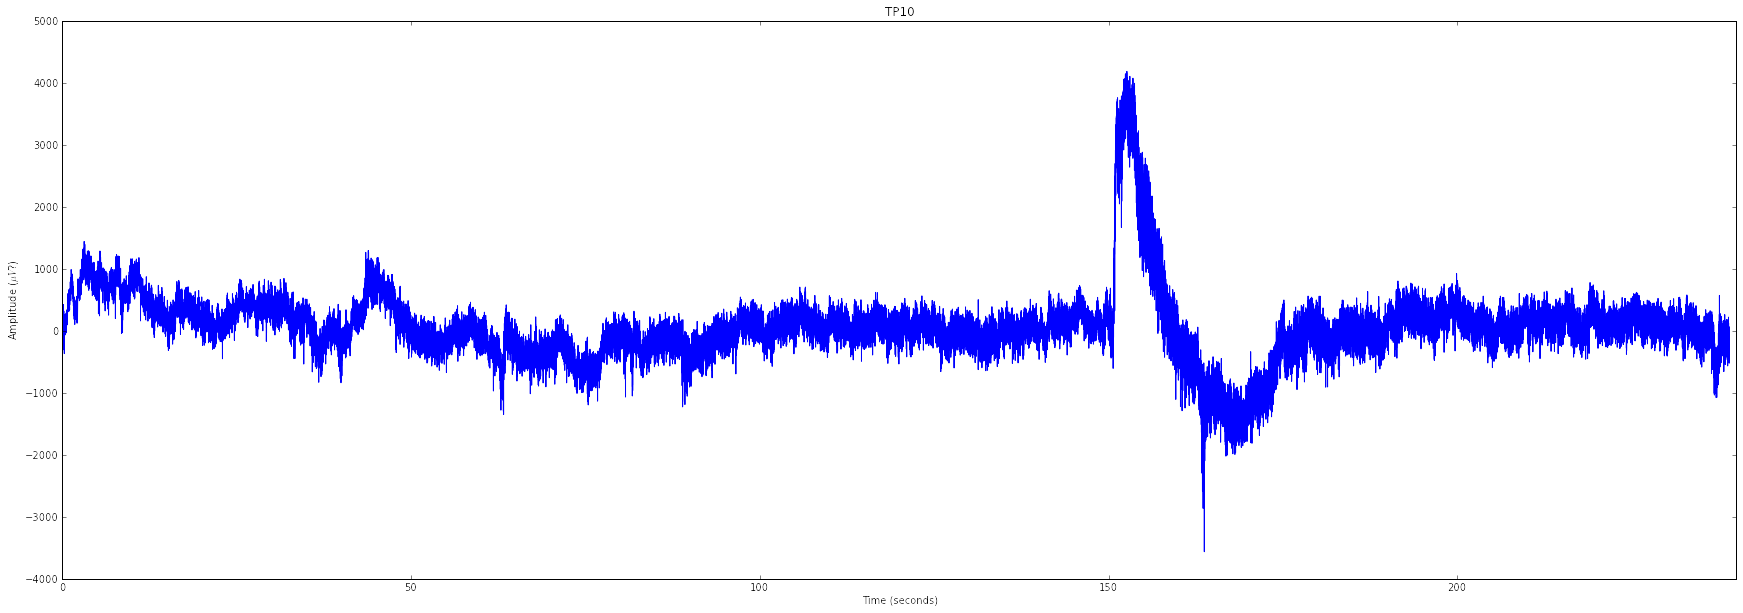

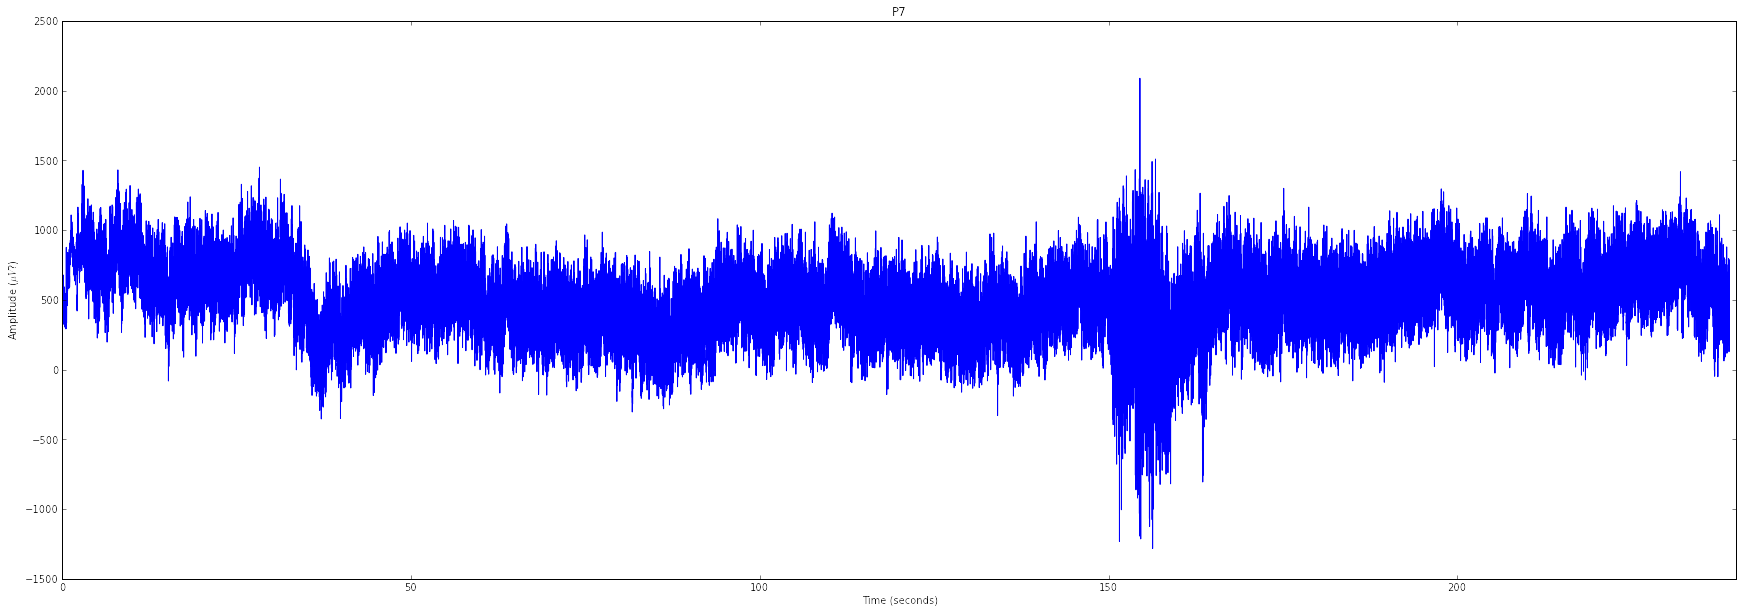

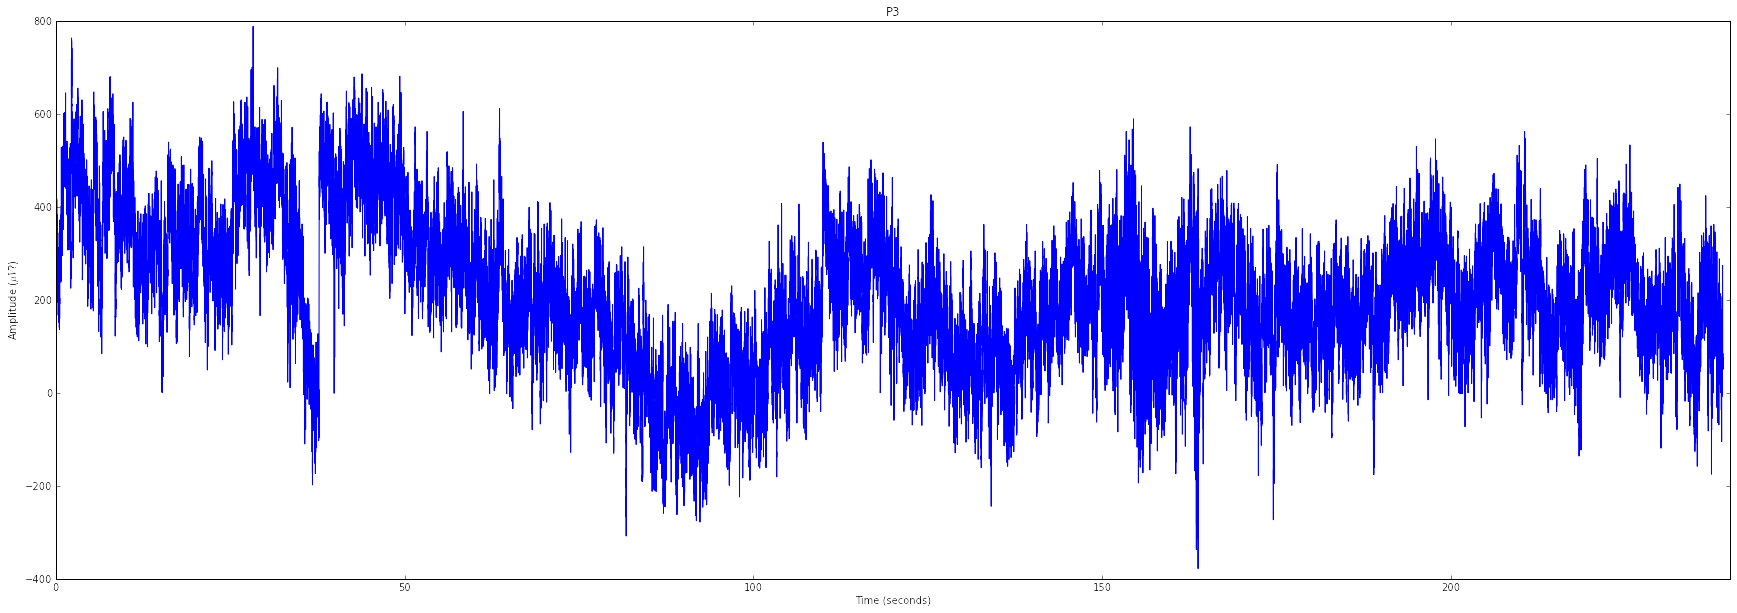

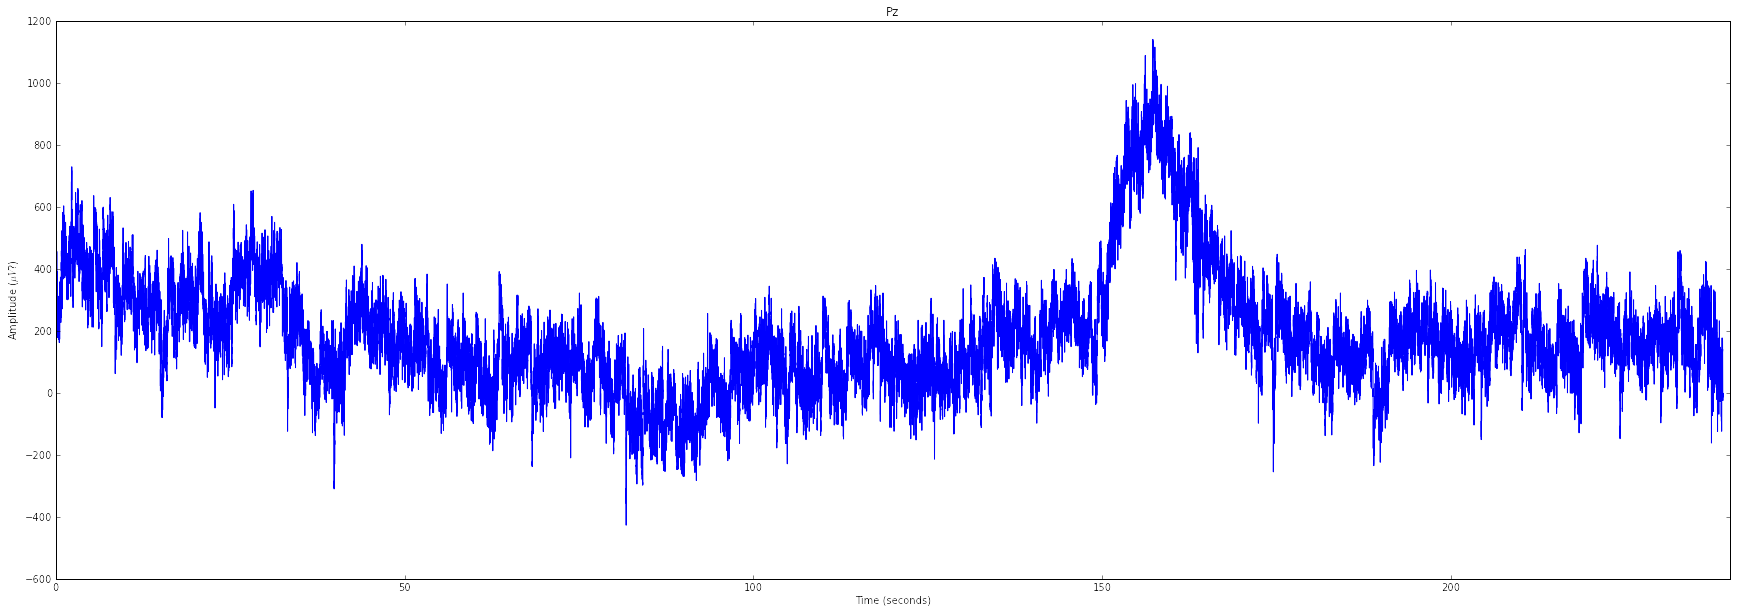

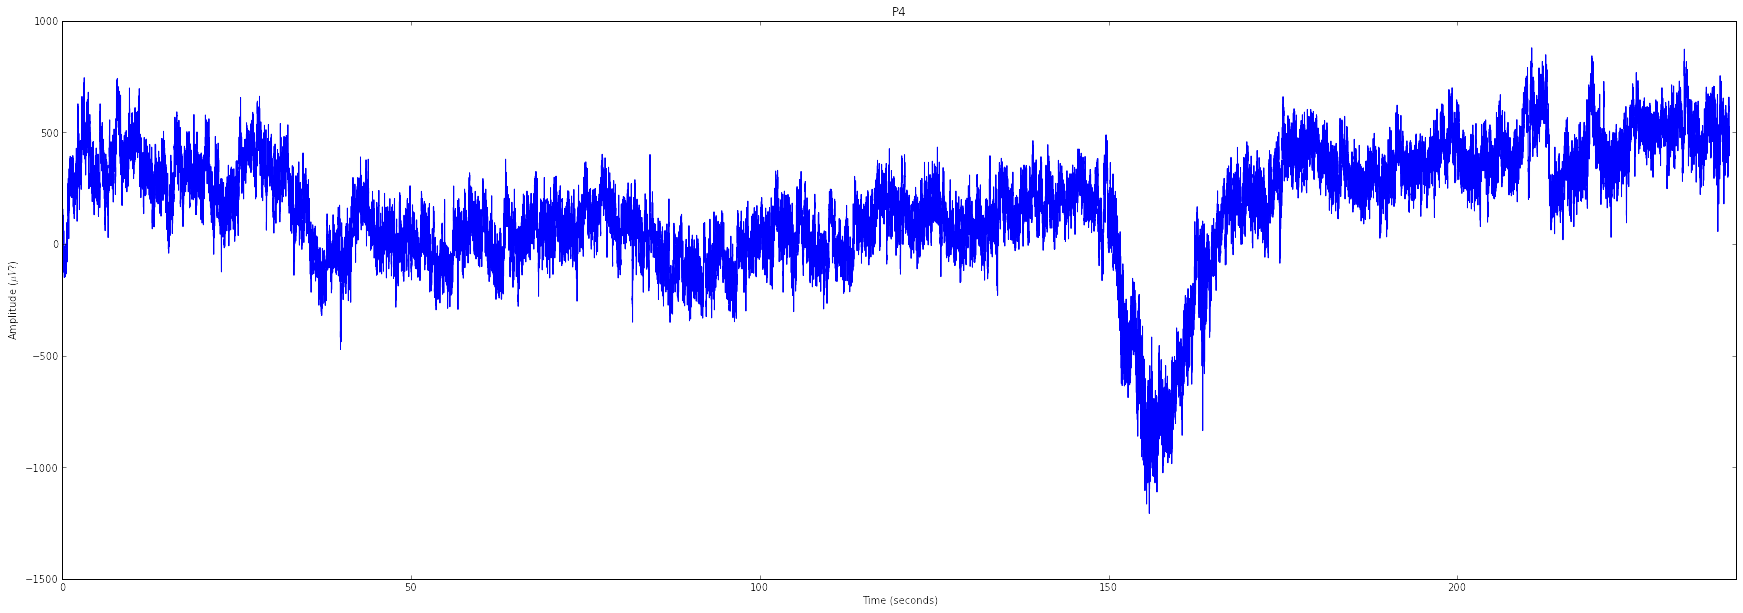

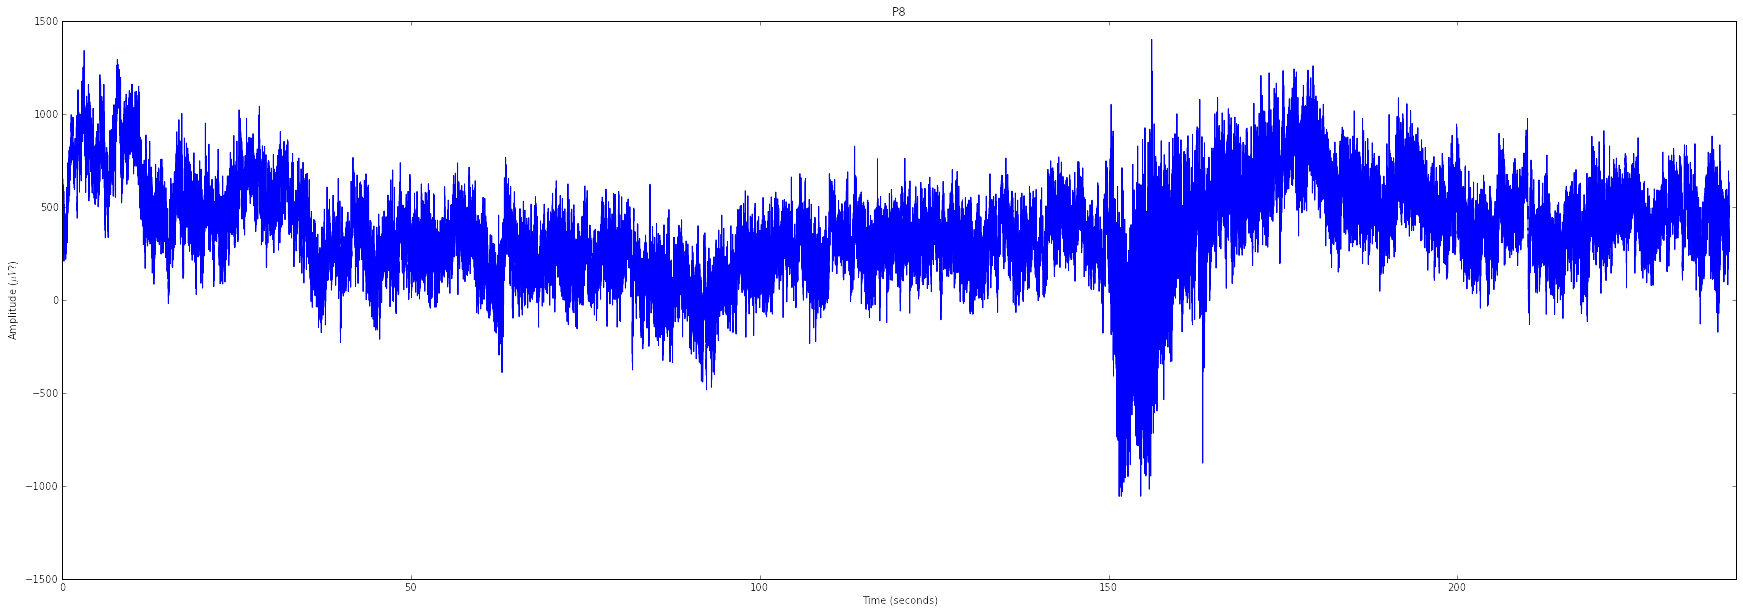

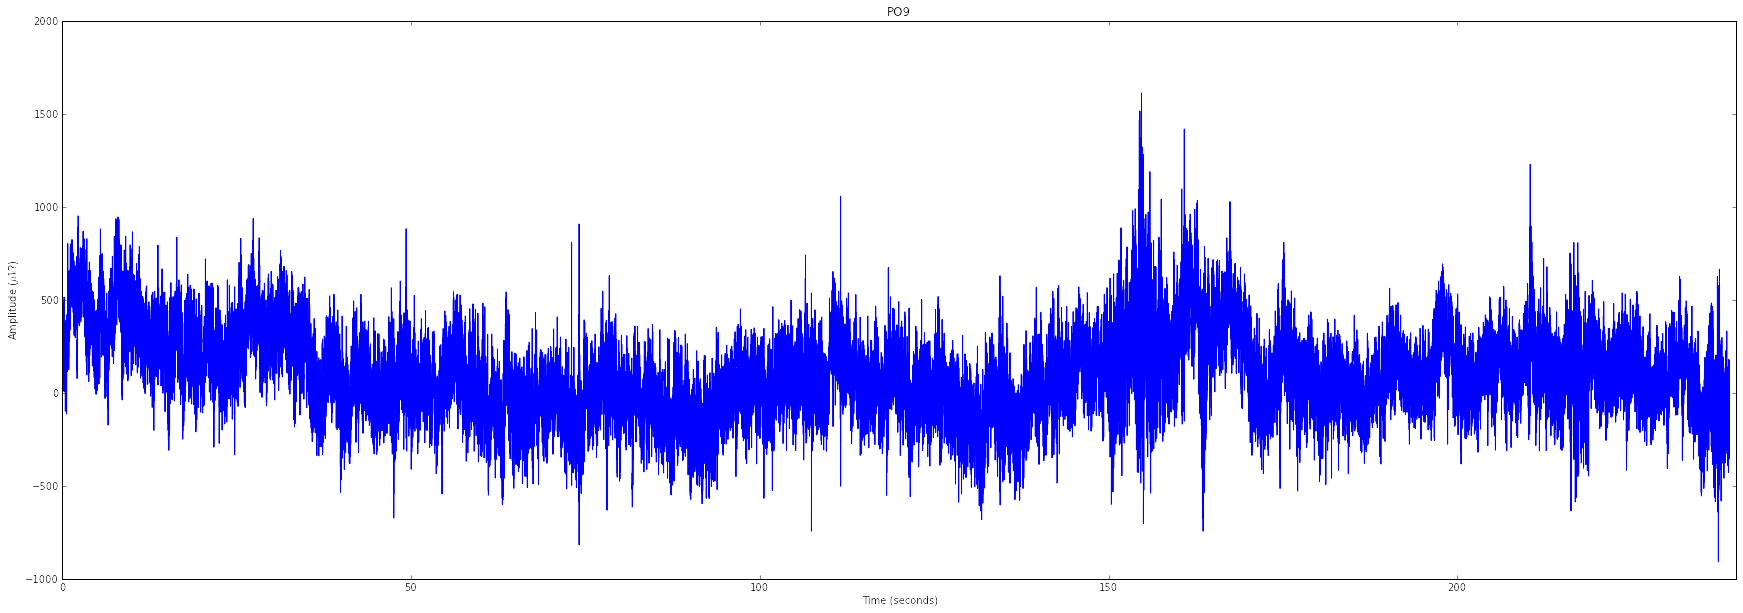

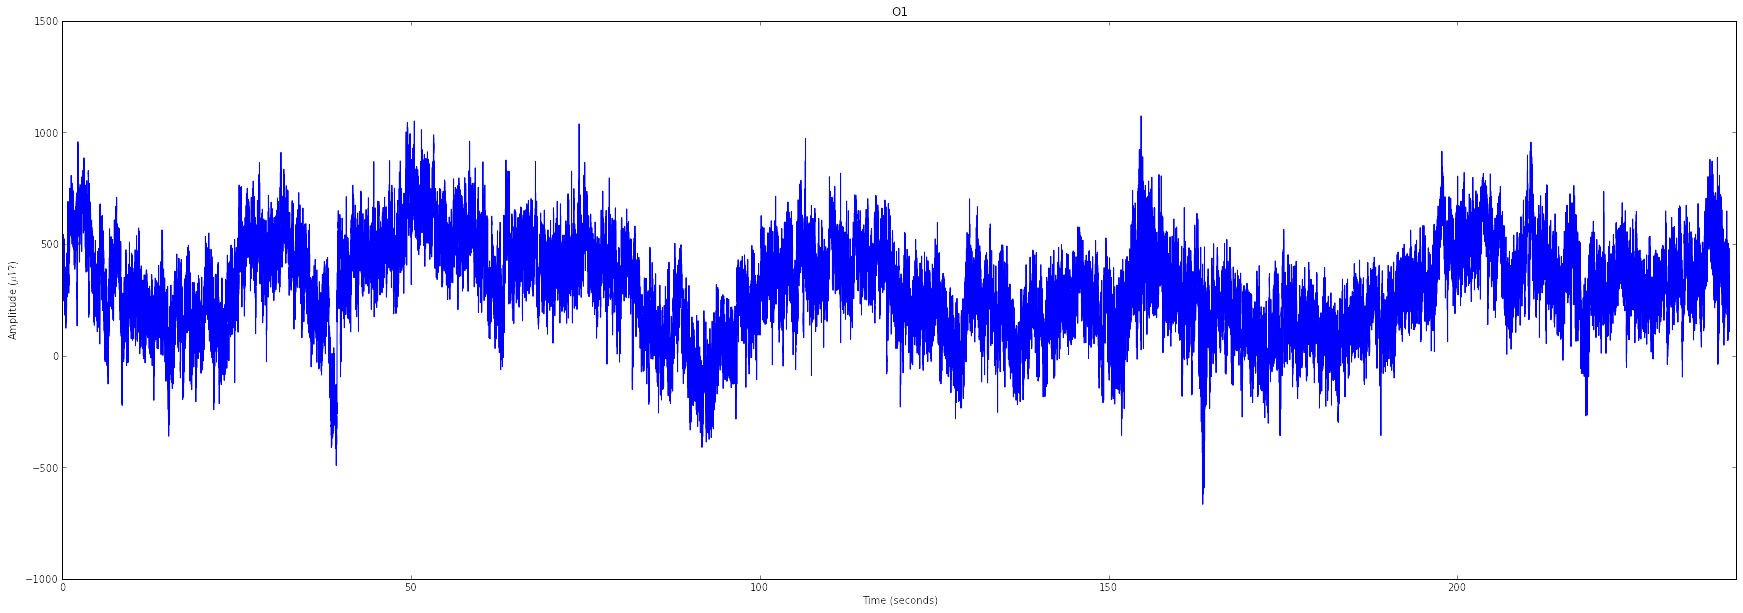

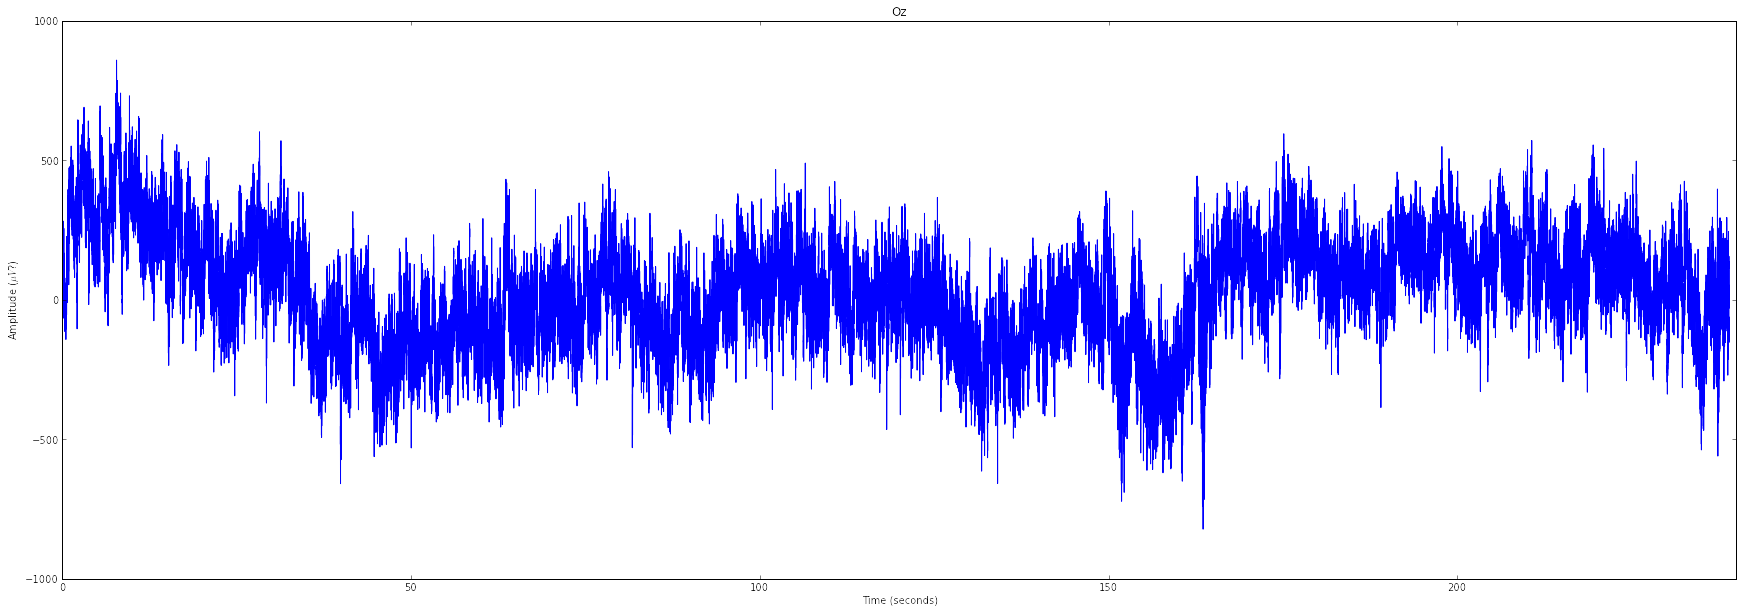

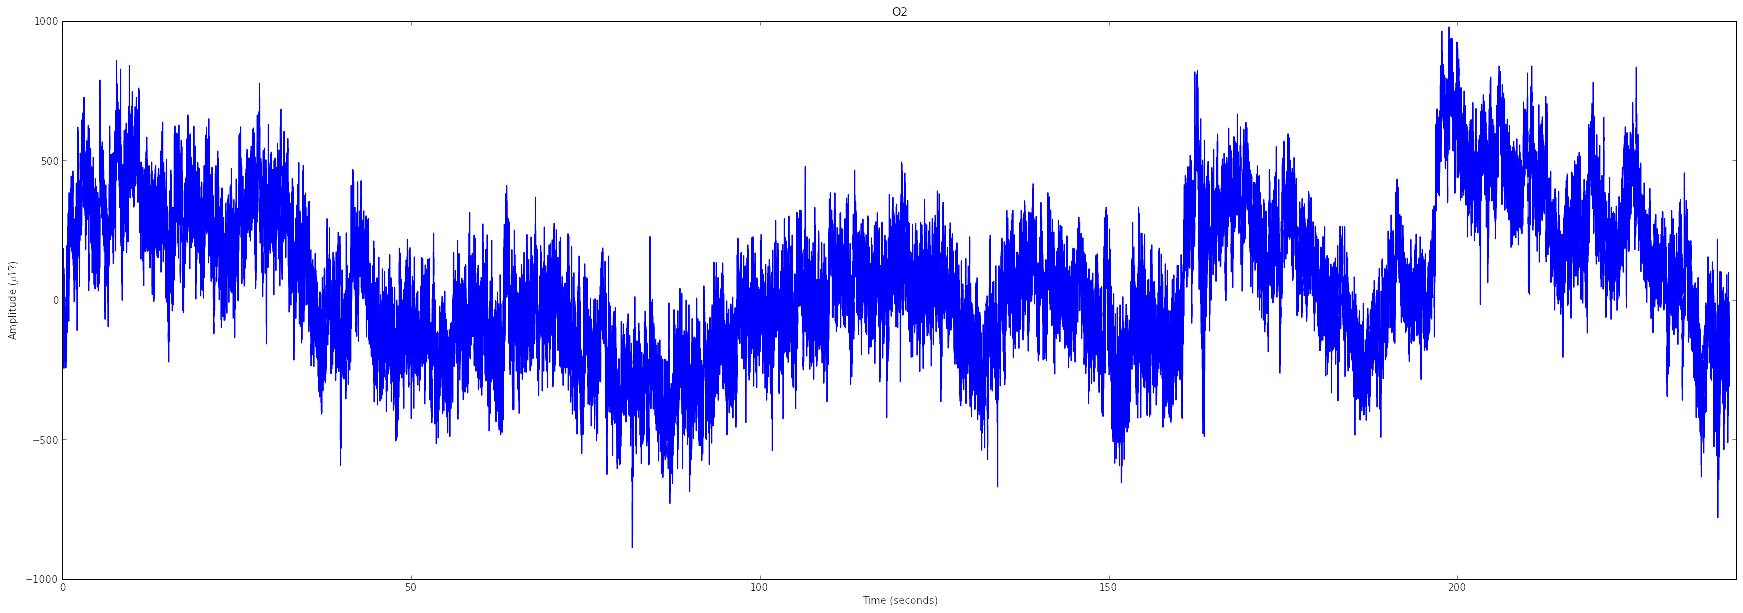

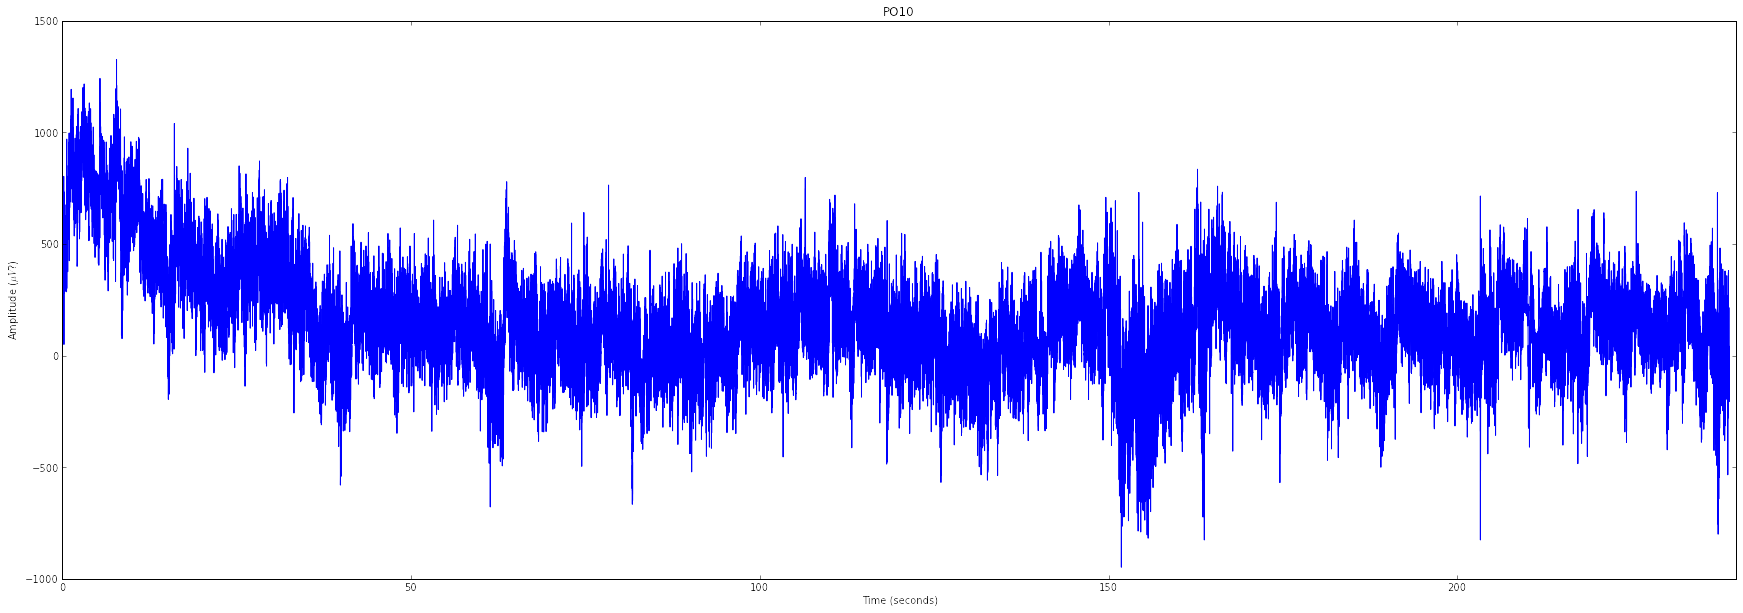

In [61]:
for col in series.columns:
    fig = plt.gcf()
    fig.set_size_inches((30, 10))
    #plt.plot(x_axis[:10000], series[col].values[:10000])
    plt.plot(x_axis, series[col].values)
    plt.xlabel('Time (seconds)')
    plt.ylabel(r'Amplitude ($\mu V$?)')
    plt.xlim(0, x_axis[-1] + 1)
    #plt.xlim(0)
    plt.title(col)
    plt.show()
    plt.close()

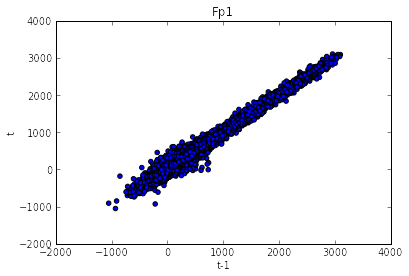

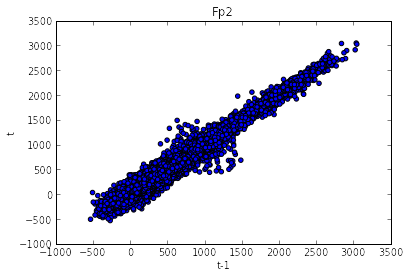

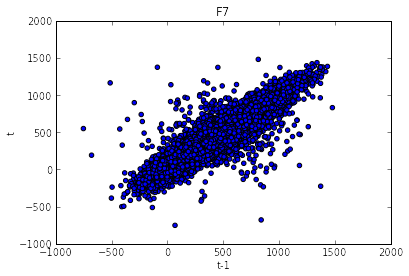

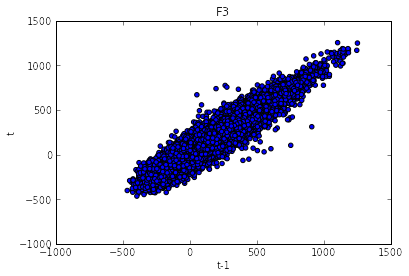

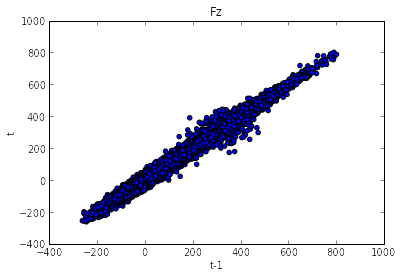

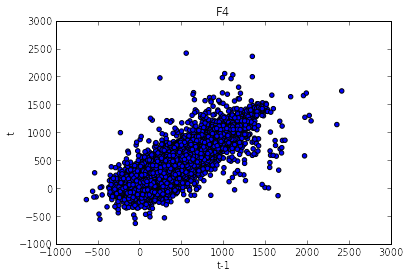

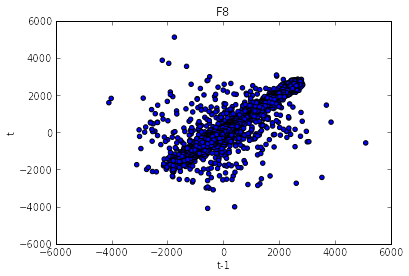

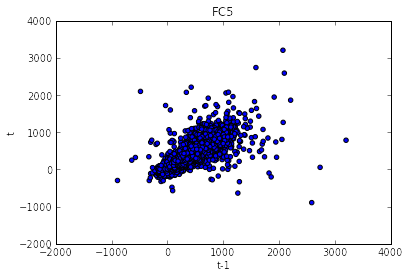

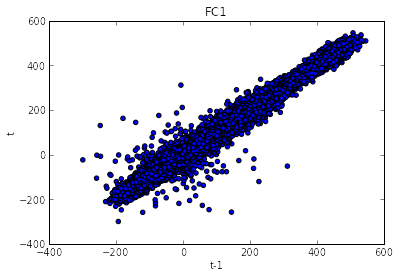

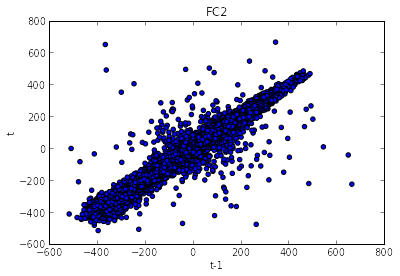

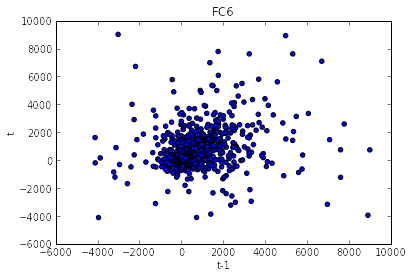

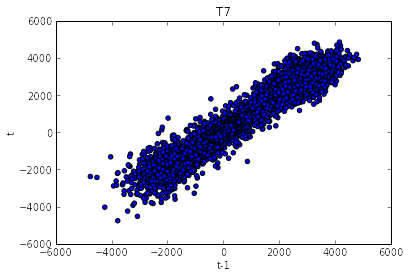

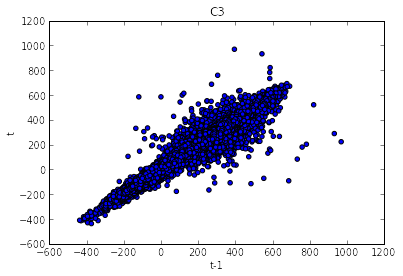

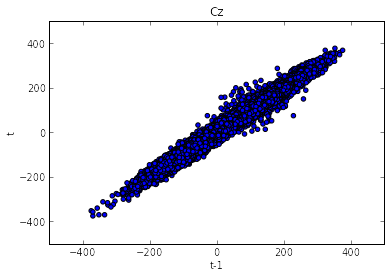

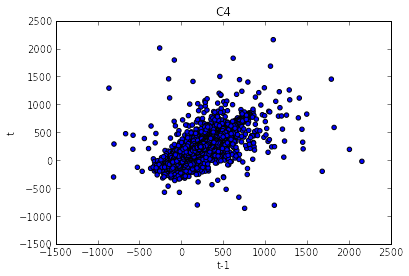

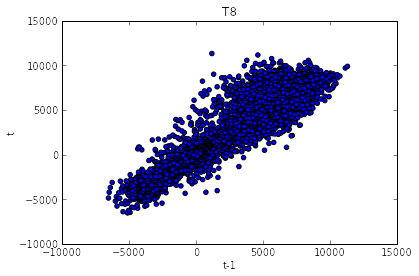

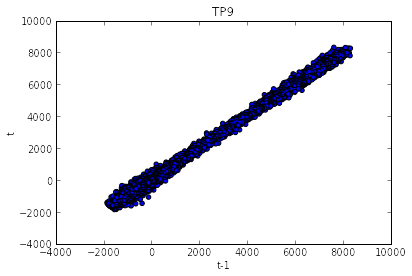

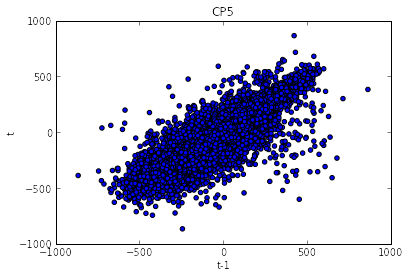

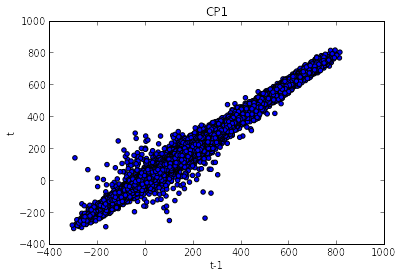

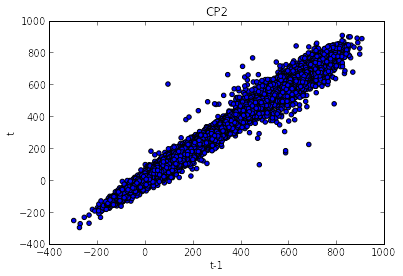

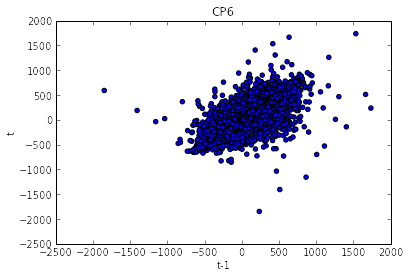

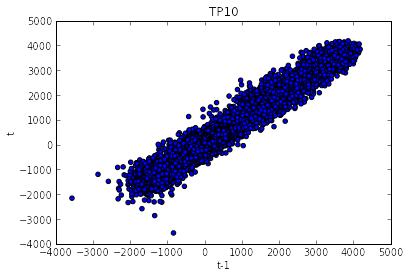

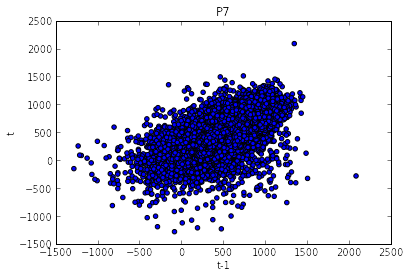

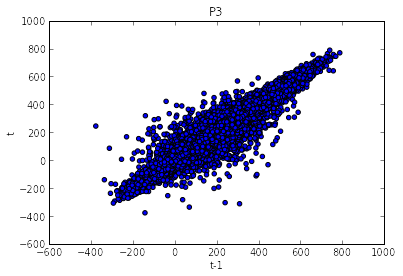

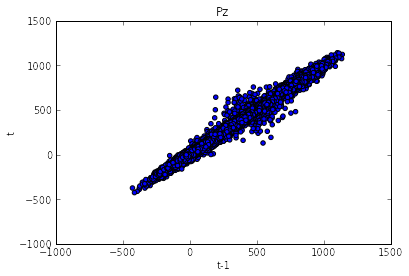

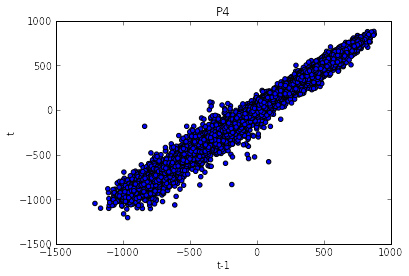

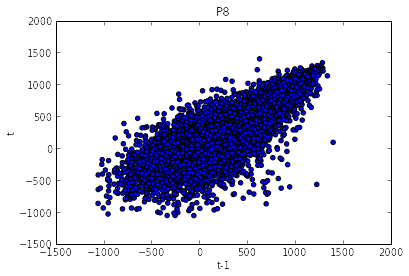

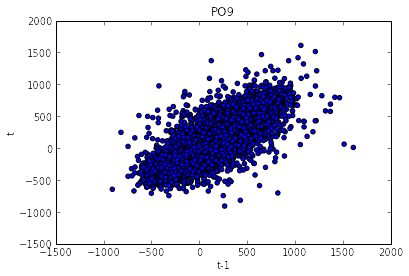

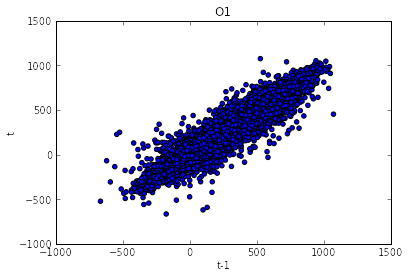

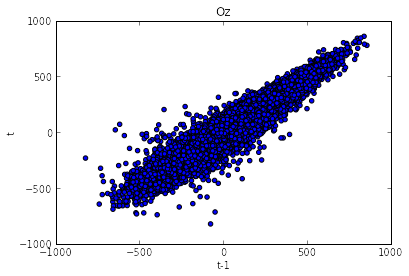

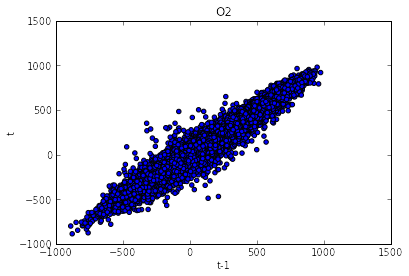

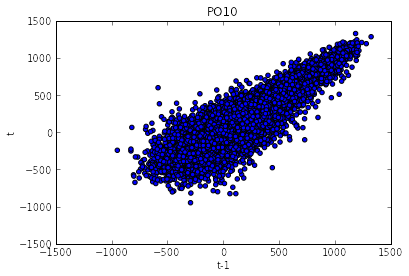

In [20]:
# autocorrelation plots
for col in series.columns:
    col_values = series[col].values
    plt.scatter(col_values[:-1], col_values[1:])
    plt.xlabel('t-1')
    plt.ylabel(r't')
    plt.title(col)
    plt.show()
    plt.close()

In [24]:
# auto correlation coefficients
for i in xrange(series.shape[1]):
    print np.corrcoef(series.values[1:, i], series.values[:-1, i])[0, 1]

0.985293330767
0.970050067339
0.939926600309
0.950694385258
0.992417819562
0.866560561164
0.958709079132
0.893824647774
0.985394065098
0.983176056738
0.85405855012
0.970567835561
0.981807272086
0.989325399965
0.948133859648
0.966229723352
0.995350024134
0.943865074152
0.991719469745
0.990426906395
0.952458935232
0.964783796704
0.810485388435
0.975639758304
0.99231957928
0.992064042164
0.920101154512
0.891182065442
0.963724746597
0.964200736023
0.979158802148
0.909636549484


In [13]:
covariance = np.cov(series.values.T)

In [14]:
corr = np.corrcoef(series.values.T)

In [17]:
for i in list(corr):
    print i

[ 1.          0.86785787  0.67557955  0.5532474   0.52137076  0.52323526
  0.53233613  0.44238044  0.36271807  0.04885051 -0.07891085  0.3531728
  0.36803194  0.27729951  0.03062243  0.42395086  0.58227445  0.03428073
  0.30410966  0.4080509   0.11898204  0.44397051  0.02941749  0.14610462
  0.41882578 -0.29115675 -0.14385341  0.28868128  0.11037356 -0.12515507
  0.0231033  -0.02859342]
[ 0.86785787  1.          0.62959198  0.57702184  0.52419722  0.57403139
  0.55382451  0.48526776  0.2553837   0.02318957  0.04555731  0.21092438
  0.38172685  0.3464034   0.0455945   0.26877198  0.5041082   0.00401696
  0.26608751  0.50033526  0.18215659  0.33587337  0.01043843  0.10796582
  0.51549454 -0.32317593 -0.04794277  0.35076424  0.04743472 -0.07379886
  0.09553957  0.03789861]
[ 0.67557955  0.62959198  1.          0.58814557  0.57090145  0.48627514
  0.55311957  0.54415233  0.33825713  0.22382116  0.12886325  0.28913644
  0.63204011  0.38239846  0.37801797  0.22074511  0.366225    0.45958082


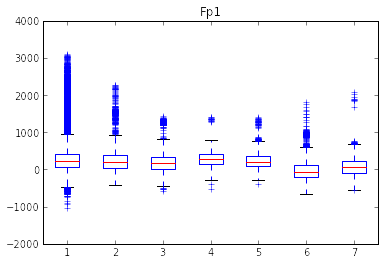

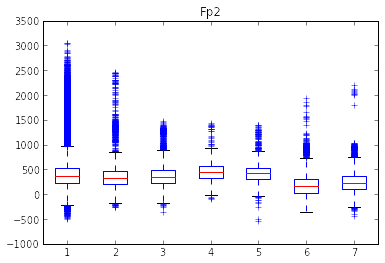

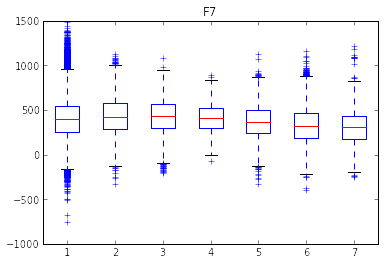

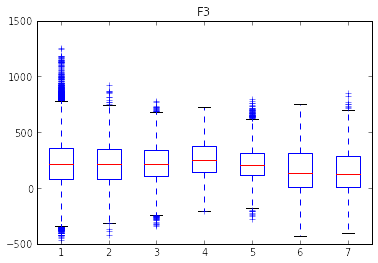

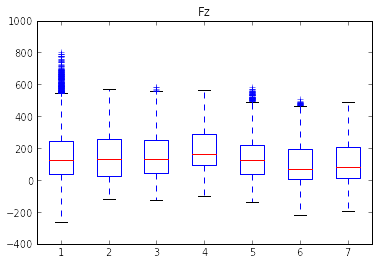

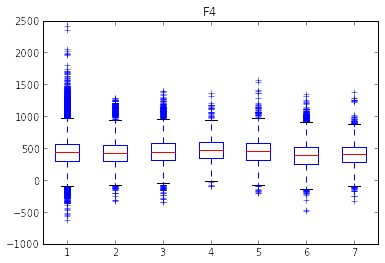

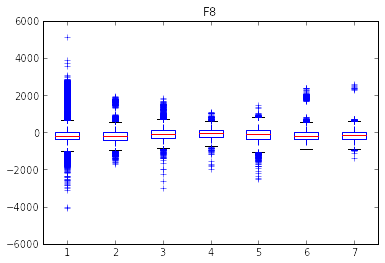

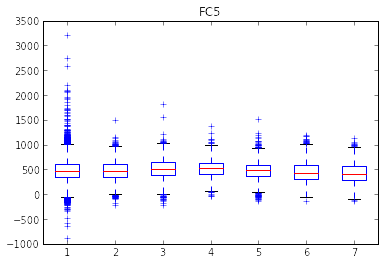

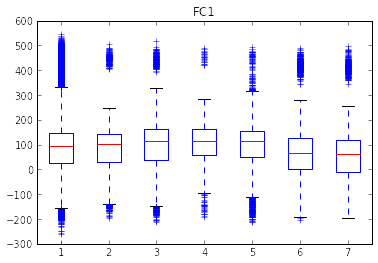

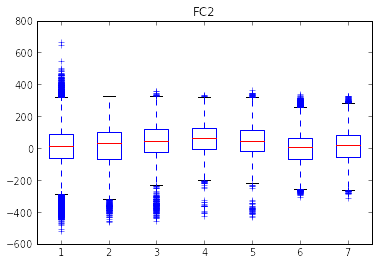

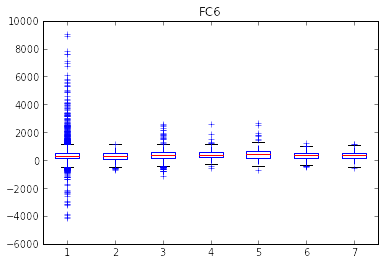

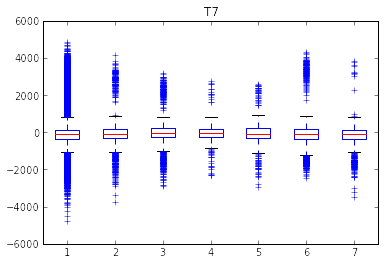

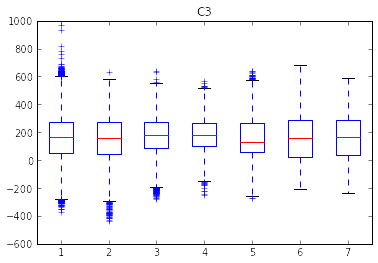

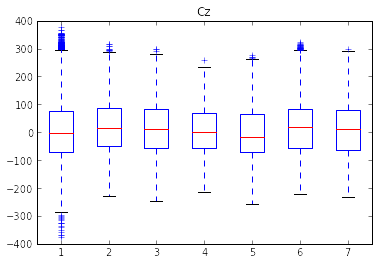

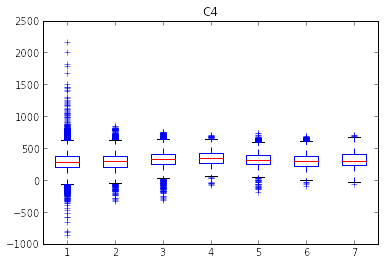

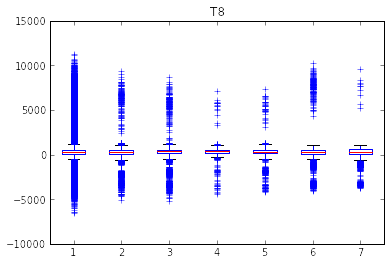

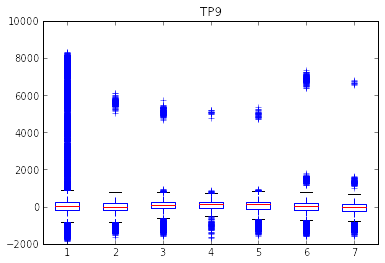

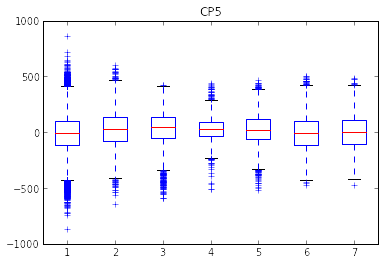

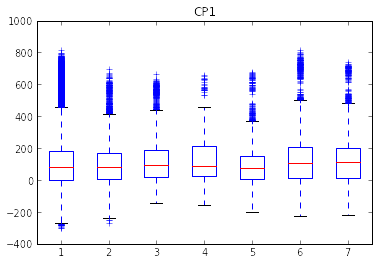

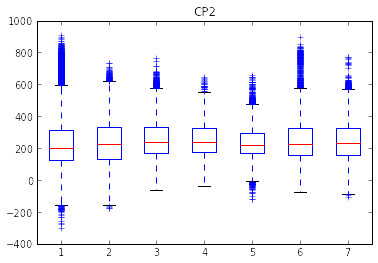

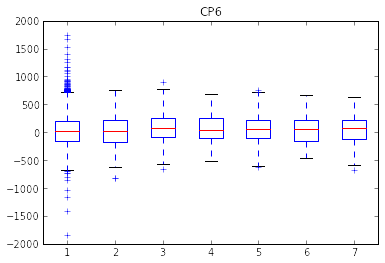

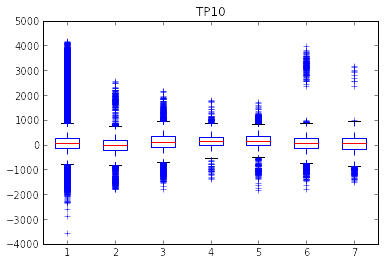

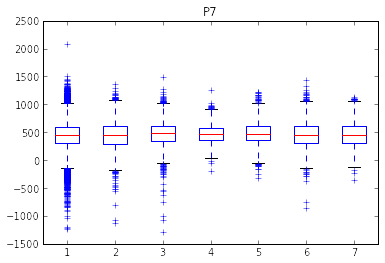

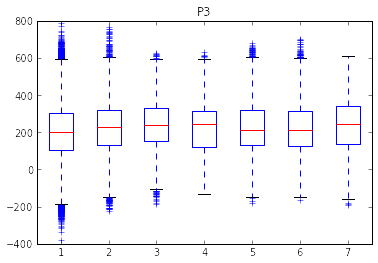

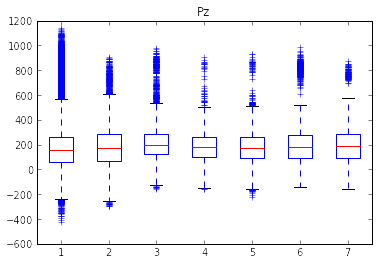

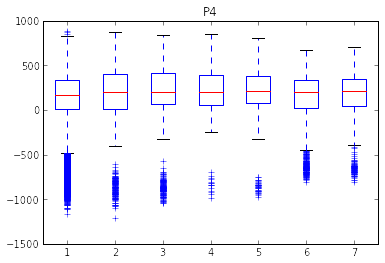

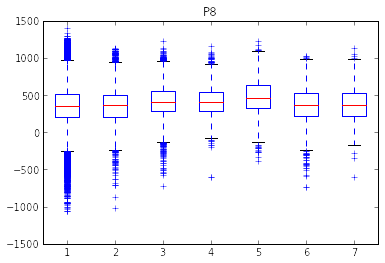

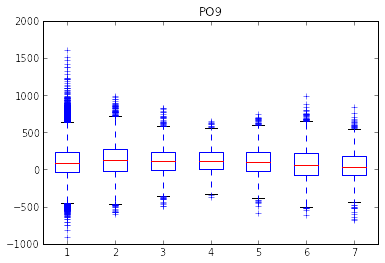

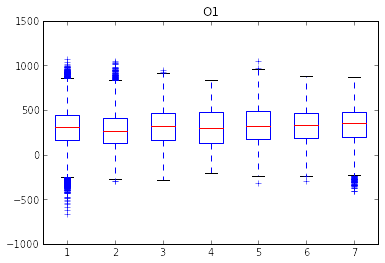

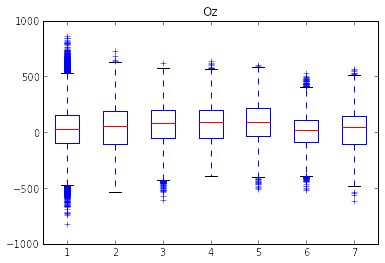

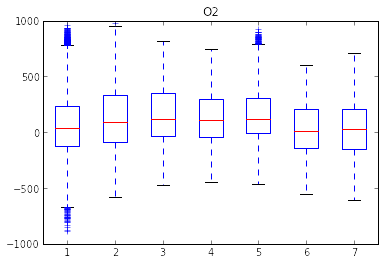

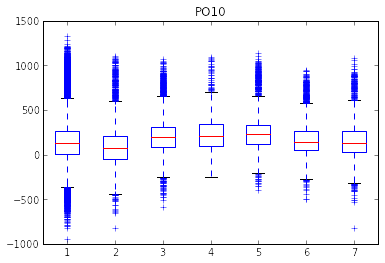

In [53]:
# distribution of first feature by class
# what do we do with overlapping classes?
# assign to both
num_classes = 7 # 6 activities plus no activity

for feature in series.columns:
    feature_by_label = []
    for i in xrange(num_classes):
        indexes = np.where(labels == i)[0]
        #print len(indexes)
        feature_by_label.append(series[feature].values[indexes])
    plt.boxplot(feature_by_label)
    plt.title(feature)
    plt.show()
    plt.close()

In [66]:
# let's try logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [93]:
y = (1 * (labels == 1))
X = series.values
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
y_prob = lr.predict_proba(X)

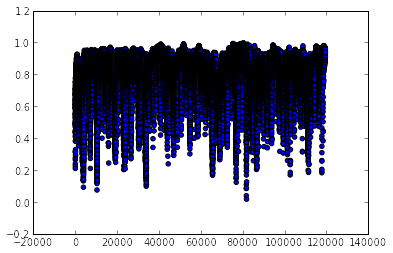

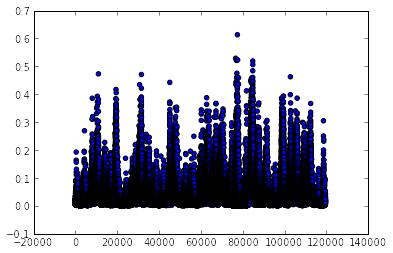

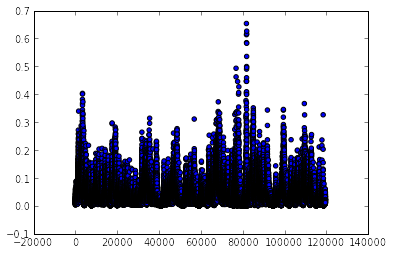

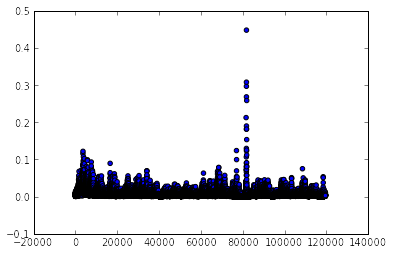

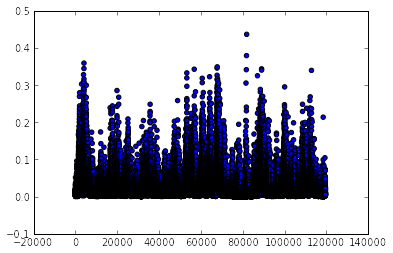

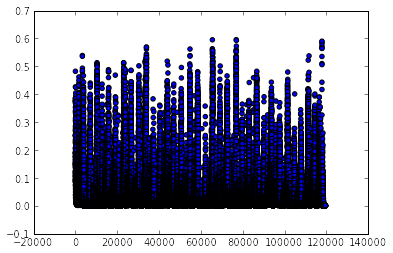

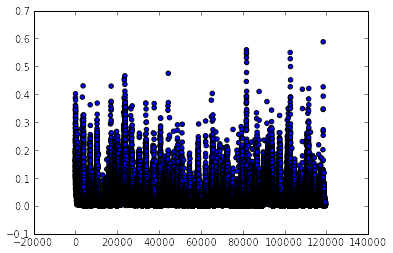

In [101]:
for i in xrange(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()

In [105]:
# things to do:
# make first submission to Kaggle
# add features from history:
#     last state seen
#     last non-zero state seen
#     time since last non-zero
#     duration of current state
def extract_features(ts):
    """
    ts is the time series of labels as a numpy array
    """
    last_state = 0
    last_state_nz = 6
    time_since_last_nz = 2
    duration_of_cur_state = 1
    X = []
    for i in xrange(len(ts)):
        cur_state = ts[i]
        X.append([last_state, last_state_nz, time_since_last_nz, duration_of_cur_state])
        if last_state == cur_state:
            duration_of_cur_state += 1
        else:
            duration_of_cur_state = 0
        if cur_state != 0:
            last_state_nz = cur_state
            time_since_last_nz = 1
        else:
            time_since_last_nz += 1
        last_state = cur_state
    X = np.array(X)
    return X

In [106]:
X = extract_features(labels)

In [108]:
lr = LogisticRegression()
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [147]:
y_prob = lr.predict_proba(X)

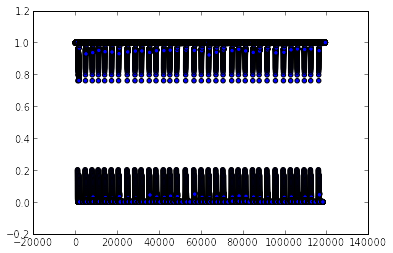

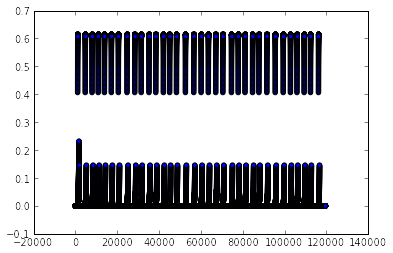

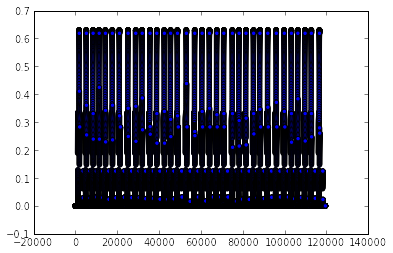

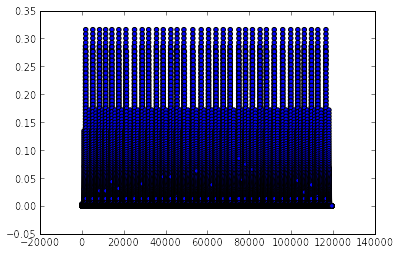

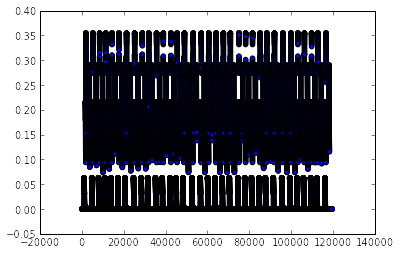

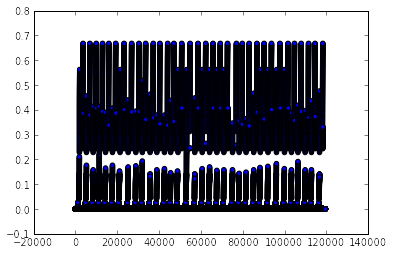

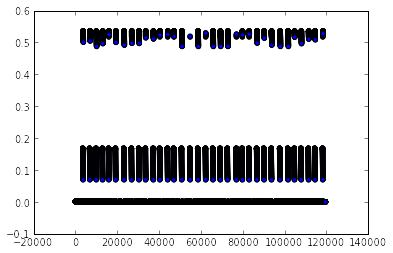

In [117]:
for i in xrange(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()

In [120]:
from sklearn.metrics import auc, roc_auc_score

In [136]:
for i in xrange(num_classes):
    y_true = (1 * (labels == i))
    print roc_auc_score(y_true, y_prob[:, i])

0.997775033554
0.99604712286
0.997761051394
0.985501504619
0.985817372109
0.991855349906
0.999332526944


In [151]:
from sklearn.metrics import precision_recall_fscore_support
y_true = labels
y_pred = np.argmax(y_prob, axis=1)
prec, rec, fscore, supp = precision_recall_fscore_support(y_true, y_pred)
print "Precision:", ["%.3f" % i for i in prec]
print "Recall:", ["%.3f" % i for i in rec]
print "F-1 Score:", ["%.3f" % i for i in fscore]
# This is not bad at all

Precision: ['0.999', '0.993', '0.918', '1.000', '0.814', '0.710', '0.991']
Recall: ['0.999', '0.993', '0.993', '0.201', '0.356', '0.993', '0.991']
F-1 Score: ['0.999', '0.993', '0.954', '0.335', '0.496', '0.828', '0.991']


In [145]:
# does it generalize to other series?
